# EDA on AMCAT Data

## importing libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We have many column names, By default Pandas show some column Names. 
# To see as many columns as possible by using pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)


# To avoid Warnings 
import warnings
warnings.filterwarnings("ignore")

## Loading DATA

In [116]:
# loading the data
df = pd.read_csv('amcat_data.csv')

df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [117]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

##### In the data set we have one Garbage Column `'Unnamed: 0'`, we cant't use this column in Analysis. Drop `'Unnamed: 0'` column

In [118]:
df = df.drop('Unnamed: 0', axis = 1)

In [119]:
print(f'Rows: {df.shape[0]} \nColumns: {df.shape[1]}\n')
data.info()

Rows: 3998 
Columns: 38

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null 

In [120]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


###### The above Description is bit confusion, so i am rounding the values to make them easy understandable.

In [121]:
np.round(df.describe())

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0
mean,663795.0,307700.0,78.0,2008.0,74.0,5157.0,2.0,71.0,5157.0,0.0,2012.0,502.0,502.0,513.0,1.0,353.0,95.0,91.0,23.0,16.0,32.0,3.0,-0.0,0.0,0.0,-0.0,-0.0
std,363218.0,212737.0,10.0,2.0,11.0,4802.0,0.0,8.0,4802.0,0.0,32.0,105.0,87.0,122.0,0.0,205.0,158.0,175.0,98.0,88.0,105.0,37.0,1.0,1.0,1.0,1.0,1.0
min,11244.0,35000.0,43.0,1995.0,40.0,2.0,1.0,6.0,2.0,0.0,0.0,180.0,195.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-4.0,-6.0,-5.0,-3.0,-7.0
25%,334284.0,180000.0,72.0,2007.0,66.0,494.0,2.0,66.0,494.0,0.0,2012.0,425.0,445.0,430.0,0.0,295.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0
50%,639600.0,300000.0,79.0,2008.0,74.0,3879.0,2.0,72.0,3879.0,0.0,2013.0,500.0,505.0,515.0,1.0,415.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-0.0,-0.0
75%,990480.0,370000.0,86.0,2009.0,83.0,8818.0,2.0,76.0,8818.0,1.0,2014.0,570.0,565.0,595.0,1.0,495.0,233.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
max,1298275.0,4000000.0,98.0,2013.0,99.0,18409.0,2.0,100.0,18409.0,1.0,2017.0,875.0,795.0,900.0,1.0,840.0,612.0,715.0,623.0,676.0,548.0,516.0,2.0,2.0,3.0,3.0,2.0


## Data Cleaning

In [122]:
# finding irregularities in the data
def irregularities(df):
    for i in df:
        print('*'*20, i, '*'*20)
        print(data[i].unique())
        print()

irregularities(df)

******************** ID ********************
[203097 579905 810601 ... 355888 947111 324966]

******************** Salary ********************
[ 420000.  500000.  325000. 1100000.  200000.  300000.  400000.  600000.
  230000.  450000.  270000.  350000.  250000.  120000.  320000.  190000.
  180000.  335000.  435000.  345000.  145000.  220000.  530000.  340000.
  360000.  215000.   80000.  330000.  380000.  110000.  205000.   95000.
  390000.   60000.  240000.  525000.  305000.  150000.  310000.  455000.
  800000.  100000.  280000.  445000.  315000.  370000.  275000. 1500000.
  425000.  470000.  460000.  510000.  480000.  170000.  640000.  225000.
  440000. 1200000.  675000.  105000.  195000.  385000.  235000.  615000.
  290000.  140000.  405000. 1860000.  375000.  430000.  660000.   70000.
  410000.  550000.   35000.  115000.  415000.  265000.  285000.  245000.
  395000.  560000.  700000.  185000.  160000.  625000.   85000.  135000.
  785000.  210000.  155000.  355000.  535000.  690000.

In [123]:
df['DOL']

0            present
1            present
2            present
3            present
4        3/1/15 0:00
            ...     
3993    10/1/12 0:00
3994     7/1/13 0:00
3995         present
3996     1/1/15 0:00
3997         present
Name: DOL, Length: 3998, dtype: object

### Observations 
| Column Name | Observation |
| :--- | :--- |
|**DOL**|It have the Value '`present`', that means the employee is working on the company now. Replace '`present`' with Today's Date|
|**JobCity**|Contains '`-1`' in the column Considered to be a `Missing Value` and City Names are not proper|
|**10board**|Contains '`0`' in the column considered as `Missing Value` and having high Cardinality. convet to State, CBSE, and ICSE Board|
|**12board**|Contains '`0`' in the column considered as `Missing Value` and having high Cardinality. convet to State, CBSE, and ICSE Board|
|**CollegeState**|Contains '`Union Territory`' in the column considered as `Missing Value`. we don't know College state belongs to which Union Territory|
|**Domain**|Contains '`-1`' in the column Considered to be a `Missing Value`|
|**Designation**|Contains '`get`' in the column Considered to be a `Missing Value`|

##### DOJ, DOB columns need to be in Date Time format, convert Data Type
* **DOL column having 'present' - Replace with present date**
    * I am considering today as `'20/03/2020'` (i.e; Before COVID-19)

In [124]:
df['DOJ'] = pd.to_datetime(df['DOJ']).dt.date
df['DOB'] = pd.to_datetime(df['DOB']).dt.date

In [125]:
today = pd.to_datetime('20/03/2020')
today

Timestamp('2020-03-20 00:00:00')

In [126]:
df['DOL'].replace('present', today, inplace=True)

In [127]:
# I Derived column a 'period' from 'DOJ' & 'DOL' columns, by subtracting the 'DOJ' from 'DOL' (i.e; DOL - DOJ) in Years
# And the column "period" shows that how many years that the employee has been there in that company.

df['period'] = pd.to_datetime(df['DOL']).dt.year - pd.to_datetime(df['DOJ']).dt.year

In [128]:
df['DOB_Year'] = pd.to_datetime(df['DOB']).dt.year

In [130]:
df['DOB'] = pd.to_datetime(df['DOB'], dayfirst=True)
df['DOJ'] = pd.to_datetime(df['DOJ'], dayfirst=True)
df['DOL'] = pd.to_datetime(df['DOL'], dayfirst=True)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

##### 12graduation & GraduationYear means Age at completion of 12graduation & GraduationYear respectively
* using this columns we can derive New columns (`12GradAge`, `GradAge`) that holding Age of person at `12graduation` & `GraduationYear`

##### GraduationYear having '`0`' in the column considered as missing values - impute the missing values using `Mode` imputation Method

In [133]:
df['GraduationYear'].mode()[0]

2013

In [143]:
df['GraduationYear'].replace(0, df['GraduationYear'].mode()[0], inplace=True)
df['GraduationYear'] = pd.to_datetime(df['GraduationYear'].astype(str) + '-01-01')
df["GYear"] = df["GraduationYear"].dt.year

In [150]:
df[['12graduation', 'GYear']]

,12graduation,GYear
0,2007,2011
1,2007,2012
2,2010,2014
3,2007,2011
4,2008,2012
...,...,...
3993,2006,2010
3994,2009,2013
3995,2008,2012
3996,2010,2014


In [155]:
df['12GradAge'] =  abs(df['12graduation'] - (df['DOB']).dt.year)
df['GradAge'] =  abs(df['GYear'] - (df['DOB']).dt.year)

In [165]:
# no.of 0's per column

(df==0).astype('int').sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscienti

In [167]:
df.isin([-1, 'NaN']).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

## `Designation` Cloumn

In [168]:
df['Designation']

0           senior quality engineer
1                 assistant manager
2                  systems engineer
3          senior software engineer
4                               get
                   ...             
3993              software engineer
3994               technical writer
3995    associate software engineer
3996             software developer
3997        senior systems engineer
Name: Designation, Length: 3998, dtype: object

In [171]:
df[df['Designation']=='get'][['Designation', 'JobCity', 'Specialization']]

,Designation,JobCity,Specialization
4,get,Manesar,electronics and communication engineering
332,get,-1,mechanical and automation
350,get,Faridabad,electrical engineering
1717,get,Hyderabad,mechanical engineering
1897,get,Hyderabad,mechanical engineering
2140,get,Indore,mechanical engineering
2318,get,Lucknow,electronics and electrical engineering
2443,get,kharagpur,mechanical engineering
2666,get,Hyderabad,electronics and electrical engineering
2757,get,Nashik,mechanical engineering


#### Observation:
* Where ever the designation is `'get'` - `70%` of them belongs to `mechanical engineering` and Remaing `30%` Belongs to `electronics and electrical engineering`

* Impute 'get' with the mode of mech and eee

In [179]:
# Mechanical Engg.
mech = df[df['Specialization'].isin(['mechanical and automation', 'mechanical engineering'])]['Designation'].mode()[0]

# eee
eee = df[df['Specialization'].isin(['electronics and electrical engineering'])]['Designation'].mode()[0]


print(mech,'\n',eee)

production engineer 
 system engineer


#### Impute the values into the Designation - `'get'`

In [182]:
df.loc[df['Specialization'].isin(['mechanical and automation', 'mechanical engineering'])]['Designation'].replace('get', mech, inplace=True)

df['Designation'].replace('get', eee, inplace=True)

## `JobCity` Cloumn

In [184]:
df['JobCity'].value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [185]:
df['JobCity'].replace('-1', 'unknown', inplace=True)
df['JobCity'] = df['JobCity'].apply(lambda x: x.strip().upper())

In [189]:
city = df['JobCity'].unique()

In [190]:
city.sort()

In [191]:
city

array(['A-64,SEC-64,NOIDA', 'AGRA', 'AHMEDABAD', 'AHMEDNAGAR',
       'AL JUBAIL,SAUDI ARABIA', 'ALLAHABAD', 'ALWAR', 'AM', 'AMBALA',
       'AMBALA CITY', 'ANGUL', 'ARIYALUR', 'ASANSOL', 'ASIFABADBANGLORE',
       'AURANGABAD', 'AUSTRALIA', 'BADDI HP', 'BAHADURGARH', 'BANAGALORE',
       'BANAGLORE', 'BANGALORE', 'BANGLORE', 'BANKURA', 'BARELI',
       'BARIPADA', 'BARODA', 'BATHINDA', 'BEAWAR', 'BELGAUM', 'BELLARY',
       'BENGALURU', 'BHAGALPUR', 'BHARUCH', 'BHILAI', 'BHIWADI', 'BHOPAL',
       'BHUBANESHWAR', 'BHUBANESWAR', 'BHUBNESHWAR', 'BIHAR', 'BIKANER',
       'BILASPUR', 'BULANDSHAHAR', 'BUNDI', 'BURDWAN', 'CALICUT',
       'CHANDIGARH', 'CHANDRAPUR', 'CHENNAI', 'CHENNAI & MUMBAI',
       'CHENNAI, BANGALORE', 'CHEYYAR', 'COIMBATORE', 'DAMAN AND DIU',
       'DAMMAM', 'DAUSA', 'DEHRADUN', 'DELHI', 'DELHI/NCR', 'DHANBAD',
       'DHARAMSHALA', 'DHARMAPURI', 'DHARUHERA', 'DUBAI', 'DURGAPUR',
       'ERNAKULAM', 'FARIDABAD', 'GAGRET', 'GAJIABAAD', 'GANDHI NAGAR',
       'GANDHI

#### City names are not in proper - Replace Names with correct names

In [192]:
jobcity_mapping = {'A-64,SEC-64,NOIDA':'Noida' ,'AGRA':'Agra', 
                     'AHMEDABAD':'Ahmedabad', 
                     'AHMEDNAGAR':'Ahmednagar', 
                     'AL JUBAIL,SAUDI ARABIA':'Al Jubail - Saudi Arabia',
                     'ALLAHABAD':'Allahabad', 
                     'ALWAR':'Alwar', 
                     'AMBALA':'Ambala', 
                     'AMBALABALA':'Ambala', 
                     'AMBALABALA CITY':'Ambala',
                     'ANGUL':'Angul', 
                     'ARIYALUR':'Ariyalur', 
                     'ASANSOL':'Asansol', 
                     'AURANGABAD':'Aurangabad', 
                     'AUSTRALIA':'Australia',
                     'BADDI HP':'Baddi', 
                     'BAHADURGARH':'Bahadurgarh', 
                     'BANGALORE':'Bengaluru', 
                     'BANKURA':'Bankura', 
                     'BARELI':'Bareli',
                     'BARIPADA':'Baripada', 
                     'BARODA':'Vadodara', 
                     'BATHINDA':'Bathinda', 
                     'BEAWAR':'Beawar', 
                     'BELGAUM':'Belagavi', 
                     'BELLARY':'Ballari',
                     'BHAGALPUR':'Bhagalpur', 
                     'BHARUCH':'Bharuch', 
                     'BHILAI':'Bhilai', 
                     'BHIWADI':'Bhiwadi', 
                     'BHOPAL':'Bhopal',
                     'BHUBANESWAR':'Bhubaneswar', 
                     'BIHAR':'Bihar', 
                     'BIKANER':'Bikaner', 
                     'BILASPUR':'Bilaspur', 
                     'BULANDSHAHAR':'Bulandshahr',
                     'BUNDI':'Bundi', 
                     'BURDWAN':'Bardhaman', 
                     'CALICUT':'Calicut', 
                     'CHANDIGARH':'Chandigarh', 
                     'CHANDRAPUR':'Chandrapur',
                     'CHENNAI':'Chennai', 
                     'CHEYYAR':'Cheyyar', 
                     'COIMBATORE':'Coimbatore', 
                     'DAMBALAAN AND DIU':'Daman and Diu',
                           'DAMBALAMAMBALA':'Ambala', 
                     'DAUSA':'Dausa', 
                     'DEHRADUN':'Dehradun', 
                     'DELHI':'Delhi',
                     'DELHI - JAISALMER':'Delhi', 
                     'DHANBAD':'Dhanbad', 
                     'DHARAMBALASHALA':'Dharamshala', 
                     'DHARMAPURI':'Dharmapuri',
                           'DHARUHERA':'Dharuhera', 
                     'DURGAPUR':'Durgapur', 
                     'ERNAKULAMBALA':'Ernakulam', 
                     'FARIDABAD':'Faridabad', 
                     'GAGRET':'Gagret',
                     'GAJIABAAD':'Ghaziabad', 
                     'GANDHI NAGAR':'Gandhinagar', 
                     'GANJAMBALA':'Ambala', 
                     'GHAZIABAD':'Ghaziabad', 
                     'GONDA':'Gonda',
                     'GORAKHPUR':'Gorakhpur', 
                     'GULBARGA':'Kalaburagi', 
                     'GURGAON':'Gurugram', 
                     'GURGAONON':'Gurugram', 
                     'GUWAHATI':'Guwahati',
                     'GWALIOR':'Gwalior', 
                     'HALDIA':'Haldia', 
                     'HARIDWAR':'Haridwar', 
                     'HARYANA':'Haryana', 
                     'HISSAR':'Hisar', 
                     'HOSPETE':'Hosapete',
                     'HOWRAH':'Howrah', 
                     'HUBLI':'Hubballi', 
                     'HYDERABAD':'Hyderabad', 
                     'INDIA':'India',
                     'INDIRAPURAMBALA, GHAZIABAD':'Ghaziabad', 
                     'INDORE':'Indore', 
                     'JABALPUR':'Jabalpur', 
                     'JAGDALPUR':'Jagdalpur',
                           'JAIPUR':'Jaipur', 
                     'JALANDHAR':'Jalandhar', 
                     'JAMBALAMU':'Jamshedpur', 
                     'JAMBALANAGAR':'Jamshedpur',
                           'JAMBALASHEDPUR':'Jamshedpur', 
                     'JASPUR':'Jaspur', 
                     'JHAJJAR':'Jhajjar', 
                     'JHANSI':'Jhansi', 
                     'JODHPUR':'Jodhpur',
                           'JOHANNESBURG':'Johannesburg - South Africa', 
                     'JOSHIMATH':'Joshimath', 
                     'JOWAI':'Jowai', 
                     'KAKINADA':'Kakinada', 
                     'KALA AMBALAB':'Ambala',
                           'KALMAR':'Kalmar - southeast Sweden', 
                     'KANPUR':'Kanpur', 
                     'KARAD':'Karad', 
                     'KARNAL':'Karnal', 
                     'KERAL':'Kerala', 
                     'KHARAGPUR':'Kharagpur',
                           'KHOPOLI':'Khopoli', 
                     'KOCHI':'Kochi', 
                     'KOCHI, CHENNAI AND COIMBATORE':'Kochi', 
                     'KOLHAPUR':'Kolhapur',
                           'KOLKATA':'Kolkata', 
                     'KOTA':'Kota', 
                     'KUDANKULAMBALA ,TARAPUR':'Kudankulam', 
                     'KURNOOL':'Kurnool', 
                     'LATUR':'Latur',
                     'LONDON':'London - UK', 
                     'LUCKNOW':'Lucknow', 
                     'LUDHIANA':'Ludhiana', 
                     'MADURAI':'Madurai', 
                     'MAHARAJGANJ':'Maharajganj',
                           'MAINPURI':'Mainpuri', 
                     'MANESAR':'Manesar', 
                     'MANGALORE':'Mangaluru', 
                     'MEERUT':'Meerut',
                           'METTUR, TAMBALAIL NADU':'Mettur', 
                     'MIRYALAGUDA':'Miryalaguda', 
                     'MOHALI':'Mohali', 
                     'MUMBAI':'Mumbai',
                           'MUMBAI , HYDERABAD':'Mumbai', 
                     'MUVATTUPUZHA':'Muvattupuzha', 
                     'MUZAFFARPUR':'Muzaffarpur', 
                     'MYSORE':'Mysuru',
                           'NAGARI':'Nagari', 
                     'NAGPUR':'Nagpur', 
                     'NALAGARH':'Nalagarh', 
                     'NANDED':'Nanded', 
                     'NASHIK':'Nashik', 
                     'NASIKCITY':'Nashik',
                           'NCR':'Delhi', 
                     'NEEMRANA':'Neemrana', 
                     'NELLORE':'Nellore', 
                     'NOIDA':'Noida', 
                     'ODISHA':'Odisha', 
                     'ONGOLE':'Ongole',
                           'PANCHKULA':'Panchkula', 
                     'PANTNAGAR':'Pantnagar', 
                     'PATIALA':'Patiala', 
                     'PATNA':'Patna', 
                     'PHAGWARA':'Phagwara', 
                     'PILANI':'Pilani',
                           'PONDICHERRY':'Pondicherry', 
                     'PONDICHERRYCHERRY':'Pondicherry', 
                     'PUNCHKULA':'Panchkula', 
                     'PUNE':'Pune',
                           'RAE BARELI':'Raebareli', 
                     'RAIGARH':'Raigarh', 
                     'RAIPUR':'Raipur', 
                     'RAJASTHAN':'Rajasthan', 
                     'RAJKOT':'Rajkot',
                           'RAJPURA':'Rajpura', 
                     'RANCHI':'Ranchi', 
                     'RAS AL KHAIMAH':'Ras Al-Khaimah - UAE', 
                     'RATNAGIRI':'Ratnagiri', 
                     'REWARI':'Rewari',
                           'ROHTAK':'Rohtak',
                     'ROORKEE':'Roorkee', 
                     'ROURKELA':'Roorkee', 
                     'RUDRAPUR':'Rudrapur', 
                     'SADULPUR':'Sadulpur',
                           'SAHIBABAD':'Sahibabad', 
                     'SALEM':'Salem', 
                     'SAMBALABALPUR':'Sambalpur', 
                     'SAMBALAPLA':'Sambalpur',
                           'SECUNDERABAD':'Hyderabad', 
                     'SHAHDOL':'Shahdol', 
                     'SHAHIBABAD':'Sahibabad', 
                     'SHIMLA':'Shimla', 
                     'SILIGURI':'Siliguri',
                           'SINGARULI':'Singrauli', 
                     'SONEPAT':'Sonipat', 
                     'SURAT':'Surat', 
                     'THANE':'Thane', 
                     'THIRUVANANTHAPURAMBALA':'Thiruvananthapuram',
                           'TIRUNELVELLI':'Tirunelveli', 
                     'TIRUPATHI':'Tirupati', 
                     'TORNAGALLU':'Toranagallu', 
                     'TRICHUR':'Thrissur', 
                     'TRICHY':'Tiruchirappalli',
                           'TRIVANDRUM':'Thiruvananthapuram', 
                     'UDAIPUR':'Udaipur', 
                     'UNNAO':'Unnao', 
                     'VADODARA':'Vadodara',
                           'VANDAVASI':'Vandavasi', 
                     'VAPI':'Vapi', 
                     'VARANASI':'Varanasi', 
                     'VELLORE':'Vellore', 
                     'VIJAYAWADA':'Vijayawada',
                     'VISAKHAPATNAM':'Visakhapatnam', 
                     'VISAKHAPATNAMBALA':'Visakhapatnam', 
                     'YAMBALAUNNAO NAGAR':'Ambala'}

for old_value, new_value in jobcity_mapping.items():
    df['JobCity'] = df['JobCity'].str.replace(old_value, new_value, regex=False)

In [193]:
len(set(jobcity_mapping.values()))

170

In [195]:
df[df['JobCity']=='A-64,SEC-64,NOIDA']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,period,DOB_Year,GYear,12GradAge,GradAge


In [196]:
df['JobCity'].unique()

array(['Bengaluru', 'Indore', 'Chennai', 'Gurugram', 'Manesar',
       'Hyderabad', 'BANGLORE', 'Noida', 'Kolkata', 'Pune', 'UNKNOWN',
       'Mohali', 'Jhansi', 'Delhi', 'Bhubaneswar', 'NAVI Mumbai',
       'Mumbai', 'NEW Delhi', 'Mangaluru', 'Rewari', 'GAZIABAAD',
       'Bhiwadi', 'Mysuru', 'Rajkot', 'GREATER Noida', 'Jaipur', 'Thane',
       'Maharajganj', 'THIRUVANANTHAPURAM', 'Panchkula', 'BHUBANESHWAR',
       'Coimbatore', 'Dhanbad', 'Lucknow', 'Thiruvananthapuram',
       'Gandhinagar', 'UNA', 'DAMAN AND DIU', 'GURGOAN', 'VSAKHAPTTNAM',
       'Nagpur', 'Bhagalpur', 'NEW Delhi - JAISALMER', 'Ahmedabad',
       'Kochi/COCHIN', 'Bankura', 'BENGALURU', 'Kanpur', 'Vijayawada',
       'Kochi', 'Beawar', 'Alwar', 'Siliguri', 'Raipur', 'Bhopal',
       'Faridabad', 'Jodhpur', 'Udaipur', 'Muzaffarpur', 'Kolkata`',
       'Bulandshahr', 'Haridwar', 'Raigarh', 'VISAKHAPatnaM', 'Jabalpur',
       'Unnao', 'Aurangabad', 'Belagavi', 'Dehradun', 'Rudrapur',
       'JAMSHEDPUR', 'VIZAG', 'NO

In [203]:
df[df["JobCity"]=="UNKNOWN"][["Designation","12GradAge","GradAge","JobCity","Gender","10percentage","10board","12percentage","12board","Degree","Specialization","CollegeState","Specialization"]].mode()

,Designation,12GradAge,GradAge,JobCity,Gender,10percentage,10board,12percentage,12board,Degree,Specialization,CollegeState,Specialization
0,software engineer,18.0,22.0,UNKNOWN,m,76.0,cbse,64.0,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh,electronics and communication engineering
1,NaN,NaN,NaN,NaN,NaN,78.0,NaN,66.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
df['JobCity'].mode()

0    Bengaluru
Name: JobCity, dtype: object

In [206]:
# we can see the mode JobCity Column is 'Bengaluru'
df["JobCity"].replace("UNKNOWN",'Bengaluru',inplace=True)

## `10board` Column

In [207]:
board_10 = df['10board'].unique()
board_10.sort()

In [208]:
board_10

array(['0', 'aisse', 'andhra pradesh board ssc',
       'andhra pradesh state board', 'anglo indian', 'ap state board',
       'ap state board for secondary education', 'apsche', 'apssc',
       'aurangabad board', 'bharathi matriculation school', 'bihar',
       'bihar board', 'bihar examination board, patna',
       'bihar school examination board',
       'bihar school examination board patna',
       'bihar secondary education board,patna', 'biharboard',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'board of intermediate education',
       'board of school education harayana',
       'board of school education haryana',
       'board of school education uttarakhand',
       'board of secendary education orissa',
       'board of secondaray education', 'board of secondary education',
       'board of secondary education (bse) orissa',
       'board of secondary education - andhra pradesh',
       'board of seco

In [209]:
state_board = ['aisse', 'andhra pradesh board ssc',
       'andhra pradesh state board', 'anglo indian', 'ap state board',
       'ap state board for secondary education', 'apsche', 'apssc',
       'aurangabad board', 'bharathi matriculation school', 'bihar',
       'bihar board', 'bihar examination board, patna',
       'bihar school examination board',
       'bihar school examination board patna',
       'bihar secondary education board,patna', 'biharboard',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'board of intermediate education',
       'board of school education harayana',
       'board of school education haryana',
       'board of school education uttarakhand',
       'board of secendary education orissa',
       'board of secondaray education', 'board of secondary education',
       'board of secondary education (bse) orissa',
       'board of secondary education - andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education rajasthan',
       'board of secondary education(bse) orissa',
       'board of secondary education, andhra pradesh',
       'board of secondary education, rajasthan',
       'board of secondary education,andhara pradesh',
       'board of secondary education,andhra pradesh',
       'board of secondary education,ap',
       'board of secondary education,odisha',
       'board of secondary education,orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary school education', 'board of ssc',
       'board of ssc education andhra pradesh',
       'board ofsecondary education,ap', 'board secondary  education',
       'bright way college, (up board)', 'bsc,orissa', 'bse',
       'bse(board of secondary education)', 'bse, odisha', 'bse,odisha',
       'bse,orissa', 'bseb', 'bseb ,patna', 'bseb patna', 'bseb, patna',
       'bseb,patna', 'bsemp', 'bsepatna', 
       'certificate of middle years program of ib', 'cgbse',
       'cgbse raipur',  'cluny',
       'council for indian school certificate examination',
       'dav public school sec 14', 'dav public school,hehal',
       'delhi board', 'delhi public school',
       'don bosco maatriculation school', 'education board of kerala',
       'ghseb', 'gseb', 'gsheb', 'gujarat board', 'gujarat state board',
       'gyan bharati school', 'haryana board of school education',
       'haryana board of school education,(hbse)', 'hbsc', 'hbse',
       'himachal pradesh board',
       'himachal pradesh board of school education',
       'holy cross matriculation hr sec school', 'hsc', 'hsce', 'hse',
       'hse,board', 'hse,orissa',  'j & k bord',
       'j&k state board of school education',
       'jawahar navodaya vidyalaya', 'jbse,jharkhand',
       'jharkhand academic council', 'jharkhand accademic council',
       'jharkhand acedemic council', 'jharkhand secondary board',
       'jharkhand secondary education board',
       'jharkhand secondary examination board (ranchi)',
       'jharkhand secondary examination board,ranchi', 'jkbose', 'jseb',
       'kalaimagal matriculation higher secondary school',
       'karantaka secondary education and examination borad', 'karnataka',
       'karnataka board', 'karnataka board of higher education',
       'karnataka board of secondary education',
       'karnataka education board', 'karnataka education board (keeb)',
       'karnataka secondary board', 'karnataka secondary education',
       'karnataka secondary education board',
       'karnataka secondary education examination board',
       'karnataka secondary eduction',
       'karnataka secondary school of examination',
       'karnataka secondory education board',
       'karnataka sslc board bangalore', 'karnataka state board',
       'karnataka state education examination board',
       'karnataka state examination board',
       'karnataka state secondary education board', 'kea', 'kerala',
       'kerala state board', 'kerala state technical education',
       'kerala university', 'kiran english medium high school',
       'kolhapur', 'kolhapur divisional board, maharashtra', 'ksbe',
       'kseb', 'kseeb',
       'kseeb(karnataka secondary education examination board)', 'ksseb',
       'ksseb(karnataka state board)', 'latur', 'latur board',
       'little jacky matric higher secondary school',
       'madhya pradesh board', 'maharashtra', 'maharashtra board',
       'maharashtra board, pune', 'maharashtra nasik board',
       'maharashtra satate board', 'maharashtra sate board',
       'maharashtra state boar of secondary and higher secondary education',
       'maharashtra state board', 'maharashtra state board for ssc',
       'maharashtra state board mumbai divisional board',
       'maharashtra state board of secondary & higher secondary education',
       'maharashtra state board of secondary and higher secondary education',
       'maharashtra state board of secondary and higher secondary education,pune',
       'maharashtra state board pune', 'maharashtra state board,pune',
       'maharashtra state(latur board)', 'maharastra board',
       'maticulation', 'matric', 'matric board', 'matriculation',
       'matriculation board', 'metric', 'mhsbse', 'mirza ahmed ali baig',
       'mp', 'mp board', 'mp board bhopal', 'mp state board', 'mp-bse',
       'mpboard', 'mpbse', 'ms board', 'msbshse,pune', 'mumbai board',
       'nagpur', 'nagpur board', 'nagpur board,nagpur',
       'nagpur divisional board', 'nashik board', 'nasik',
       'national public school', 'pseb', 'pune', 'pune board',
       'punjab school education board, mohali', 'rajasthan board',
       'rajasthan board ajmer', 'rajasthan board of secondary education',
       'rbse', 'rbse (state board)', 'rbse,ajmer', 'sarada high scchool',
       'school secondary education, andhra pradesh', 'seba',
       'seba(assam)', 'secondary board of rajasthan',
       'secondary education board of rajasthan',
       'secondary school cerfificate', 'secondary school certificate',
       'secondary school education', 'secondary school of education',
       'secondary state certificate',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ssc', 'ssc board of andrapradesh', 'ssc maharashtra board',
       'ssc regular', 'ssc-andhra pradesh', 'sslc', 'sslc board',
       'sslc,karnataka', 'sss pune', 'state', 'state board',
       'state board ', 'state board (jac, ranchi)',
       'state board - west bengal board of secondary education : wbbse',
       'state board of karnataka',
       'state board of secondary education( ssc)',
       'state board of secondary education, andhra pradesh',
       'state board of secondary education, ap',
       'state board of secondary education,andhra pradesh',
       'state boardmp board ', 'state borad hp', 'state bord',
       'state(karnataka board)', 'stateboard',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'stjosephs girls higher sec school,dindigul',
       'stmary higher secondary', "stmary's convent inter college",
       'tamil nadu state', 'tamilnadu matriculation board',
       'tamilnadu state board', 'tn state board', 'u p', 'u p board',
       'ua', 'up', 'up baord', 'up board', 'up board , allahabad',
       'up board allahabad', 'up board,allahabad', 'up borad', 'up bord',
       'up bourd', 'up(allahabad)', 'up-board', 'upbhsie', 'upboard',
       'uttar pradesh', 'uttar pradesh board', 'uttarakhand board',
       'uttaranchal shiksha avam pariksha parishad',
       'uttaranchal state board', 'uttrakhand board', 'uttranchal board',
       'wbbsce', 'wbbse', 'west bengal  board of secondary education',
       'west bengal board of secondary education',
       'west bengal board of secondary eucation',
       'west bengal board of secondary examination (wbbse)']

cbse_board = ['cbsc', 'cbse', 'cbse ',
       'cbse board', 'cbse[gulf zone]',
       'central board of secondary education',
       'central board of secondary education, new delhi']

icse_board = ['icse', 'icse board', 'icse',
       'icse board , new delhi', 'cicse', 'icse board', 'new delhi']

In [210]:
# Replace 10board column with 'State Board', 'Central Board', 'ICSE Board'

for i in state_board:
    df['10board'].replace(i, 'State Board', inplace=True)

In [211]:
for j in cbse_board:
    df['10board'].replace(j, 'CBSE', inplace=True)

In [212]:
for k in icse_board:
    df['10board'].replace(k, 'ICSE', inplace=True)

In [217]:
df['10board'].unique()

array(['State Board', 'CBSE', 'ICSE', '0'], dtype=object)

In [218]:
df['10board'].mode()[0]

'State Board'

In [219]:
df['10board'].replace('0', df['10board'].mode()[0], inplace=True)

In [221]:
df['10board'].unique()

array(['State Board', 'CBSE', 'ICSE'], dtype=object)

## `12board` Column

In [225]:
df['12board'] = df['12board'].apply(lambda x: x.strip())

In [226]:
df["12board"].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', '0', 'bseb', 'chse', 'puc',
       'upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board',

In [227]:
board_12 = df['12board'].unique()
board_12.sort()

In [228]:
board_12

array(['0', 'ahsec', 'aissce', 'aligarh muslim university',
       'all india board', 'amravati divisional board',
       'andhpradesh board of intermediate education', 'andhra board',
       'andhra pradesh', 'andhra pradesh board of secondary education',
       'andhra pradesh state board', 'ap board',
       'ap board for intermediate education', 'ap intermediate board',
       'apbie', 'apbsc', 'apsb', 'aurangabad board',
       'baord of intermediate education', 'bciec,patna', 'bice', 'bie',
       'bieap', 'biec', 'biec patna', 'biec, patna', 'biec,patna',
       'biec-patna', 'bihar', 'bihar board',
       'bihar intermediate education council',
       'bihar intermediate education council, patna',
       'bihar school examination board patna',
       'board fo intermediate education, ap',
       'board of high school and intermediate education uttarpradesh',
       'board of higher secondary examination, kerala',
       'board of higher secondary orissa',
       'board of inter

In [229]:
state_board_12 = ['ahsec', 'aissce', 'aligarh muslim university',
       'all india board', 'amravati divisional board',
       'andhpradesh board of intermediate education', 'andhra board',
       'andhra pradesh', 'andhra pradesh board of secondary education',
       'andhra pradesh state board', 'ap board',
       'ap board for intermediate education', 'ap intermediate board',
       'apbie', 'apbsc', 'apsb', 'aurangabad board',
       'baord of intermediate education', 'bciec,patna', 'bice', 'bie',
       'bieap', 'biec', 'biec patna', 'biec, patna', 'biec,patna',
       'biec-patna', 'bihar', 'bihar board',
       'bihar intermediate education council',
       'bihar intermediate education council, patna',
       'bihar school examination board patna',
       'board fo intermediate education, ap',
       'board of high school and intermediate education uttarpradesh',
       'board of higher secondary examination, kerala',
       'board of higher secondary orissa',
       'board of intermeadiate education', 'board of intermediate',
       'board of intermediate ap', 'board of intermediate education',
       'board of intermediate education, andhra pradesh',
       'board of intermediate education, ap',
       'board of intermediate education,andhra pradesh',
       'board of intermediate education,andra pradesh',
       'board of intermediate education,ap',
       'board of intermediate education,hyderabad',
       'board of intermediate education:ap,hyderabad',
       'board of intermediate(bie)', 'board of intermediate,ap',
       'board of intermidiate', 'board of intermidiate education,ap',
       'board of intermidiate examination',
       'board of intmediate education ap',
       'board of intrmediate education,ap',
       'board of school education harayana',
       'board of school education uttarakhand',
       'board of secondary education',
       'board of secondary education rajasthan',
       'board of secondary education, rajasthan',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary school of education',
       'board of technical education',
       'board of technicaleducation ,delhi', 'boardofintermediate',
       'borad of intermediate', 'bright way college, (up board)', 'bseb',
       'bseb, patna', 'bsemp', 'bte up', 'bte,delhi', 'bteup', 
       'certificate for higher secondary education (chse)orissa', 'cgbse',
       'cgbse raipur', 'chsc', 'chse',
       'chse(concil of higher secondary education)', 'chse, odisha',
       'chse,odisha', 'chse,orissa', 'cicse',
       'council for indian school certificate examination',
       'dav public school', 'dav public school sec 14',
       'dav public school,hehal',
       'department of pre university education',
       'department of pre-university education',
       'department of pre-university education(government of karnataka)',
       'department of pre-university education, bangalore',
       'department of pre-university eduction',
       'department of technical education',
       'department of technical education, bangalore',
       'dept of pre-university education',
       'diploma ( maharashtra state board of technical education)',
       'diploma in computers',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'diploma(msbte)', 'directorate of technical education,banglore',
       'dote (diploma - computer engg)', 'dpue', 'dte',
       'electonincs and communication(dote)', 'ghseb',
       'government polytechnic mumbai , mumbai board',
       'govt of karnataka department of pre-university education', 'gseb',
       'gseb/technical education board', 'gsheb', 'gshseb',
       'gujarat board',
       'haryana state board of technical education chandigarh', 'hbsc',
       'hbse', 'higher secondary', 'higher secondary education',
       'higher secondary state certificate', 'himachal pradesh board',
       'himachal pradesh board of school education',
       'hisher seconadry examination(state board)',
       'holy cross matriculation hr sec school', 'hsc',
       'hsc maharashtra board', 'hsc pune', 'hse',
       'hslc (tamil nadu state board)', 'ibe',  'intermediate',
       'intermediate board', 'intermediate board examination',
       'intermediate board of andhra pardesh',
       'intermediate board of education',
       'intermediate board of education,andhra pradesh',
       'intermediate council patna', 'intermediate state board',
       'intermedite', 'intermideate', 'intermidiate',
       'international baccalaureate (ib) diploma',  'j & k board',
       'j&k state board of school education', 'jaswant modern school',
       'jawahar higher secondary school', 'jaycee matriculation school',
       'jharkhand academic council',
       'jharkhand acamedic council (ranchi)',
       'jharkhand accademic council', 'jharkhand acedemic council',
       'jharkhand board', 'jiec', 'jkbose', 'jstb,jharkhand',
       'jyoti nivas', 'karanataka secondary board', 'karnatak pu board',
       'karnataka board', 'karnataka board of university',
       'karnataka board secondary education', 'karnataka education board',
       'karnataka pre university board', 'karnataka pre unversity board',
       'karnataka pre-university', 'karnataka pre-university board',
       'karnataka pu', 'karnataka pu board',
       'karnataka secondary education',
       'karnataka secondary education board', 'karnataka sslc',
       'karnataka state', 'karnataka state board',
       'karnataka state examination board',
       'karnataka state pre- university board', 'kea', 'kerala',
       'kerala state board', 'kerala state hse board',
       'kerala university', 'kolhapur',
       'kolhapur divisional board, maharashtra',
       'ks rangasamy institute of technology', 'latur', 'latur board',
       'lucknow public college', 'madhya pradesh board',
       'madhya pradesh open school', 'maharashtra', 'maharashtra board',
       'maharashtra board, pune', 'maharashtra nasik board',
       'maharashtra satate board',
       'maharashtra state boar of secondary and higher secondary education',
       'maharashtra state board', 'maharashtra state board for hsc',
       'maharashtra state board mumbai divisional board',
       'maharashtra state board of secondary & higher secondary education',
       'maharashtra state(latur board)', 'matric board', 'matriculation',
       'mbose', 'mp', 'mp board', 'mp board bhopal', 'mp-bse', 'mpboard',
       'mpbse', 'mpc', 'ms board', 'msbshse,pune', 'msbte',
       'msbte (diploma in computer technology)', 'msbte pune', 'nagpur',
       'nagpur board', 'nagpur board,nagpur', 'nagpur divisional board',
       'narayana junior college', 'nashik board', 'nasik', 'nios',
       'p u board, karnataka', 'pre university', 'pre university board',
       'pre university board of karnataka',
       'pre university board, karnataka', 'pre-university',
       'pre-university board', 'preuniversity board(karnataka)', 'psbte',
       'pseb', 'pu', 'pu  board karnataka', 'pu board',
       'pu board ,karnataka', 'pu board karnataka', 'pub', 'puboard',
       'puc', 'pue', 'pune board',
       'punjab state board of technical education & industrial training',
       'punjab state board of technical education & industrial training, chandigarh',
       'rajasthan board', 'rajasthan board ajmer',
       'rajasthan board of secondary education', 'rbse',
       'rbse (state board)', 's j polytechnic', 'sbte, jharkhand',
       'sbtet', 'science college', 'scte & vt (diploma)',
       'scte and vt ,orissa', 'scte vt orissa', 'scte&vt',
       'sda matric higher secondary school',
       'secnior secondary education board of rajasthan',
       'secondary board of rajasthan', 'sjrcw',
       'sri chaitanya junior kalasala',
       'sri kannika parameswari highier secondary school, udumalpet',
       'sri sankara vidyalaya', 'srv girls higher sec school,rasipuram',
       'ssc', 'ssm srsecschool', 'st joseph hr sec school', 'staae board',
       'state', 'state  board of intermediate education, andhra pradesh',
       'state board', 'state board (jac, ranchi)',
       'state board - tamilnadu',
       'state board - west bengal council of higher secondary education : wbchse',
       'state board of karnataka', 'state board of technical education',
       'state board of technical education and training',
       'state board of technical education harayana',
       'state board of technical eduction panchkula', 'state bord',
       'state broad', 'state syllabus', 'stateboard',
       'stateboard/tamil nadu',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'stmiras college for girls', 'tamil nadu polytechnic',
       'tamil nadu state', 'tamil nadu state board',
       'tamilnadu higher secondary education board',
       'tamilnadu state board', 'tamilnadu stateboard',
       'technical board, punchkula', 'tn state board', 'u p', 'u p board',
       'ua', 'uo board', 'up', 'up baord', 'up board',
       'up board , allahabad', 'up board allahabad', 'up board,allahabad',
       'up bord', 'up bourd', 'up(allahabad)', 'up-board', 'upbhsie',
       'upboard', 'uttar pradesh', 'uttar pradesh board',
       'uttarakhand board', 'uttaranchal shiksha avam pariksha parishad',
       'uttaranchal state board', 'uttrakhand board', 'uttranchal board',
       'wbbhse', 'wbchse', 'wbscte',
       'west bengal board of higher secondary education',
       'west bengal council of higher secondary education',
       'west bengal council of higher secondary eucation',
       'west bengal council of higher secondary examination (wbchse)',
       'west bengal state council of technical education']

cbse_board_12 = ['cbese',
       'cbsc', 'cbse', 'cbse board', 'cbse,new delhi',
       'central board of secondary education',
       'central board of secondary education, new delhi']

icse_board_12 = ['icse', 'ipe', 'isc',
                'isc board', 'isc board , new delhi', 'isce',
                'cicse']

In [230]:
# Replace 12board column with 'State Board', 'Central Board', 'ICSE Board'

for i in state_board_12:
    df['12board'].replace(i, 'State Board', inplace=True)

In [231]:
for j in cbse_board_12:
    df['12board'].replace(j, 'CBSE', inplace=True)

In [232]:
for k in icse_board_12:
    df['12board'].replace(k, 'ICSE', inplace=True)

In [233]:
df['12board'].unique()

array(['State Board', 'CBSE', 'ICSE', '0'], dtype=object)

In [234]:
df['12board'].mode()[0]

'State Board'

In [235]:
df['12board'] = df['12board'].replace('0', df['12board'].mode()[0])

## `Specialization` Column

In [236]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [237]:
specialization_mapping = {'electronics and communication engineering' : 'ECE',
 'computer science & engineering' : 'CSE',
 'information technology' : 'CSE' ,
 'computer engineering' : 'CSE',
 'computer application' : 'CSE',
 'mechanical engineering' : 'MECH',
 'electronics and electrical engineering' : 'ECE',
 'electronics & telecommunications' : 'ECE',
 'electrical engineering' : 'EEE',
 'electronics & instrumentation eng' : 'ECE',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'ECE',
 'information science engineering' : 'CSE',
 'instrumentation and control engineering' : 'ECE',
 'electronics engineering' : 'ECE',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'ECE',
 'computer science and technology' : 'CSE',
 'telecommunication engineering' : 'ECE',
 'mechanical and automation' : 'MECH',
 'automobile/automotive engineering' : 'MECH',
 'instrumentation engineering' : 'ECE',
 'mechatronics' : 'MECH',
 'electronics and computer engineering' : 'CSE',
 'aeronautical engineering' : 'MECH',
 'computer science' : 'CSE',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'ECE',
 'electrical and power engineering' : 'EEE',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CSE',
 'embedded systems technology' : 'ECE',
 'power systems and automation' : 'EEE',
 'computer and communication engineering' : 'CSE',
 'information science' : 'CSE',
 'internal combustion engine' : 'MECH',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'MECH',
 'control and instrumentation engineering' : 'ECE',
 'polymer technology' : 'other',
 'electronics' : 'ECE'}

for old, new in specialization_mapping.items():
    df['Specialization'] = df['Specialization'].replace(old, new)

In [239]:
df['Specialization'].unique()

array(['CSE', 'ECE', 'MECH', 'EEE', 'CE', 'other'], dtype=object)

## `'Domain'` Column
* Domain Column having positive values between 0 to 1, But, `-1` seems to be irrelevent or anomaly is considered as Missing value
* **Impute `-1` with Median of the Domain column** 

In [240]:
df['Domain'].unique()

array([ 0.63597876,  0.96060325,  0.45087658,  0.97439611,  0.12450207,
       -1.        ,  0.35653649,  0.8295846 ,  0.69447933,  0.49359639,
        0.76567358,  0.9682375 ,  0.22948175,  0.53838689,  0.30840058,
        0.91139528,  0.56326782,  0.86468541,  0.64938971,  0.74475835,
        0.88412251,  0.88162007,  0.20739217,  0.48674701,  0.67074315,
        0.62264292,  0.41383826,  0.52592258,  0.73579571,  0.13044174,
        0.23780284,  0.11213944,  0.37755142,  0.06696071,  0.08005528,
        0.92564577,  0.84312373,  0.91686996,  0.78330354,  0.60005718,
        0.79293628,  0.79358061,  0.16563309,  0.75537512,  0.99990456,
        0.33878635,  0.91077016,  0.98205712,  0.84224832,  0.01854094,
        0.05316031,  0.94211655,  0.12301673,  0.48834798,  0.37605959,
        0.0587928 ,  0.10487136,  0.60064396,  0.70409041,  0.14478989,
        0.81941653,  0.65576694,  0.02106623,  0.44461772,  0.83762073,
        0.72598415,  0.95389978,  0.04099931,  0.02196911,  0.34

In [246]:
df['Domain'].median()

0.6226429158

In [247]:
df['Domain'].replace(-1, df['Domain'].median(), inplace=True)

In [248]:
df['Domain'].unique()

array([0.63597876, 0.96060325, 0.45087658, 0.97439611, 0.12450207,
       0.62264292, 0.35653649, 0.8295846 , 0.69447933, 0.49359639,
       0.76567358, 0.9682375 , 0.22948175, 0.53838689, 0.30840058,
       0.91139528, 0.56326782, 0.86468541, 0.64938971, 0.74475835,
       0.88412251, 0.88162007, 0.20739217, 0.48674701, 0.67074315,
       0.41383826, 0.52592258, 0.73579571, 0.13044174, 0.23780284,
       0.11213944, 0.37755142, 0.06696071, 0.08005528, 0.92564577,
       0.84312373, 0.91686996, 0.78330354, 0.60005718, 0.79293628,
       0.79358061, 0.16563309, 0.75537512, 0.99990456, 0.33878635,
       0.91077016, 0.98205712, 0.84224832, 0.01854094, 0.05316031,
       0.94211655, 0.12301673, 0.48834798, 0.37605959, 0.0587928 ,
       0.10487136, 0.60064396, 0.70409041, 0.14478989, 0.81941653,
       0.65576694, 0.02106623, 0.44461772, 0.83762073, 0.72598415,
       0.95389978, 0.04099931, 0.02196911, 0.3423149 , 0.53586282,
       0.90148957, 0.96177212, 0.67964464, 0.93839914, 0.19015

* Succesfully imputed `-1` with its `Median` Value

## `CollegeState` Column
* CollegeState column contains State name as `Union Territory` with 5 entries. we can Avoid making changes

In [249]:
df['CollegeState'].value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

# Analysis Starts Here 😱
***

## Univariate Analysis ☝

In [250]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,period,DOB_Year,GYear,12GradAge,GradAge
0,203097,420000.0,2012-06-01,2020-03-20,senior quality engineer,Bengaluru,f,1990-02-19,84.3,State Board,2007,95.8,State Board,1141,2,B.Tech/B.E.,CSE,78.00,1141,0,Andhra Pradesh,2011-01-01 01:00:00-01:00,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,8,1990,2011,17,21
1,579905,500000.0,2013-09-01,2020-03-20,assistant manager,Indore,m,1989-10-04,85.4,CBSE,2007,85.0,CBSE,5807,2,B.Tech/B.E.,ECE,70.06,5807,0,Madhya Pradesh,2012-01-01 01:00:00-01:00,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,7,1989,2012,18,23
2,810601,325000.0,2014-06-01,2020-03-20,systems engineer,Chennai,f,1992-08-03,85.0,CBSE,2010,68.2,CBSE,64,2,B.Tech/B.E.,CSE,70.00,64,0,Uttar Pradesh,2014-01-01 01:00:00-01:00,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,6,1992,2014,18,22
3,267447,1100000.0,2011-07-01,2020-03-20,senior software engineer,Gurugram,m,1989-12-05,85.6,CBSE,2007,83.6,CBSE,6920,1,B.Tech/B.E.,CSE,74.64,6920,1,Delhi,2011-01-01 01:00:00-01:00,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,9,1989,2011,18,22
4,343523,200000.0,2014-03-01,2015-01-03,system engineer,Manesar,m,1991-02-27,78.0,CBSE,2008,76.8,CBSE,11368,2,B.Tech/B.E.,ECE,73.90,11368,0,Uttar Pradesh,2012-01-01 01:00:00-01:00,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1991,2012,17,21


## `Salary` Column

In [251]:
df['Salary'].min()

35000.0

<Axes: xlabel='Salary', ylabel='Count'>

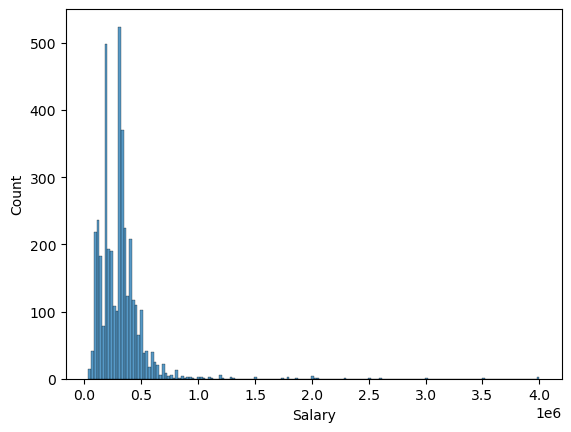

In [252]:
sns.histplot(data=df, x='Salary')

<Axes: xlabel='Salary', ylabel='Density'>

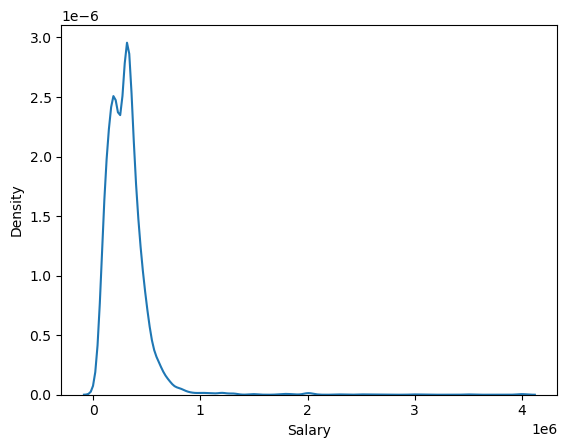

In [257]:
sns.kdeplot(data=df, x='Salary')

* Salary of people <50000 might enter Monthly salary instead of Yearly Salary

In [264]:
df[df['Salary'] <= 50000]['Salary'] *= 12

<Axes: ylabel='Frequency'>

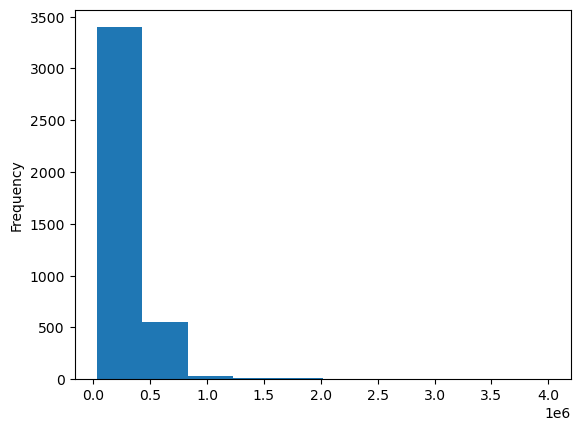

In [265]:
df['Salary'].plot(kind='hist')

<Axes: ylabel='Frequency'>

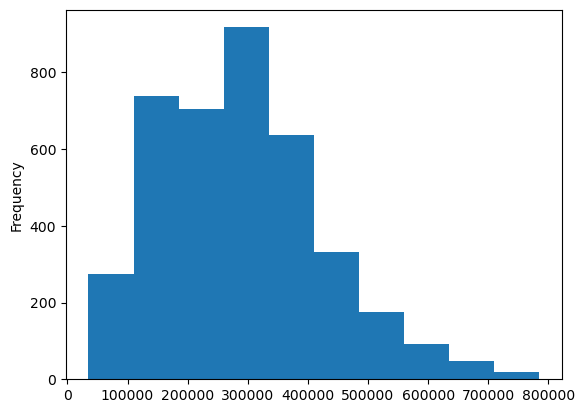

In [266]:
df[df['Salary']< 800000]['Salary'].plot(kind='hist')

<Axes: ylabel='Density'>

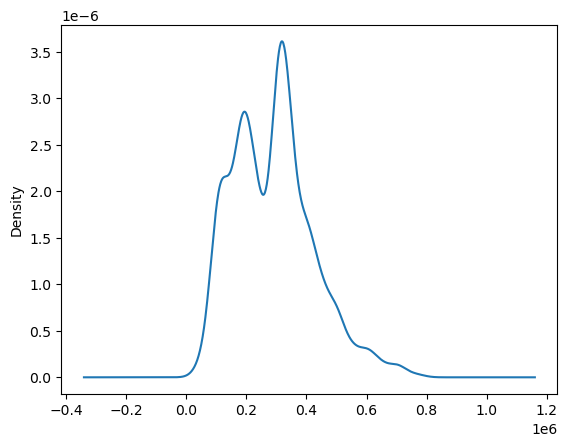

In [267]:
df[df['Salary']< 800000]['Salary'].plot(kind='kde')

## 'ComputerProgramming',  'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg'   'ElectricalEngg', 'TelecomEngg', 'CivilEng Columns contain `-1 ` g'

In [268]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'period', 'DOB_Year', 'GYear', '12GradAge', 'GradAge'],
      dtype='object')

In [269]:
df[['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']]

,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,445,-1,-1,-1,-1,-1,-1
1,-1,466,-1,-1,-1,-1,-1
2,395,-1,-1,-1,-1,-1,-1
3,615,-1,-1,-1,-1,-1,-1
4,-1,233,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
3993,345,-1,-1,-1,-1,-1,-1
3994,325,420,-1,-1,-1,-1,-1
3995,405,-1,-1,-1,-1,-1,-1
3996,445,-1,438,-1,-1,-1,-1


<Figure size 1500x500 with 0 Axes>

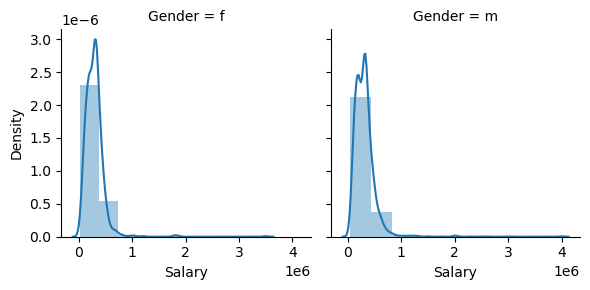

In [272]:
plt.figure(figsize=(15,5))
colors = sns.color_palette('bright',n_colors=2)
sns.FacetGrid(df, col="Gender", palette=colors).map(sns.distplot, "Salary",bins=10)
plt.show()

* **The distributions are right skewed, Male and Female have almost same distribution**

## `Designation` Column - Univariate

In [273]:
df['Designation'].nunique()

418

* **Designation Column having `More cardinality`**
* We can change the Designation column to low cardinality

In [274]:
desig = df['Designation'].unique()

desig.sort()

In [80]:
desig

array(['.net developer', '.net web developer', 'account executive',
       'account manager', 'admin assistant', 'administrative coordinator',
       'administrative support', 'aircraft technician',
       'android developer', 'application developer',
       'application engineer', 'apprentice', 'ase', 'asp.net developer',
       'assistant administrator', 'assistant electrical engineer',
       'assistant engineer', 'assistant manager', 'assistant professor',
       'assistant programmer', 'assistant software engineer',
       'assistant store manager', 'assistant system engineer',
       'assistant system engineer - trainee',
       'assistant system engineer trainee', 'assistant systems engineer',
       'associate developer', 'associate engineer', 'associate manager',
       'associate qa', 'associate software developer',
       'associate software engg', 'associate software engineer',
       'associate system engineer', 'associate technical operations',
       'associate test engi

In [344]:
def feature_cleaning(input_val, input_list):
  if type(input_val) == str:
    for item in [i for i in input_list if len(i.split()) > 1]:
      if all([x in input_val for x in item.split()]):
        return item.title()
          
    for item in [i for i in input_list if len(i.split()) == 1]:
      if item in input_val:
        return item.title()
    if 'engineer' in input_val:
      return 'Hardware Engineer'
    try:
      matched_item = get_close_matches(input_val, input_list)[0]
      return matched_item.title()
    except:
      return 'Other'
        
  else:
    return np.nan

In [345]:
roles_list = ['software engineer', 'system engineer', 'developer', 'analyst', 'test engineer', 'dba', 
            'administrator', 'customer service', 'quality engineer', 'quality', 'automation engineer',
            'network engineer', 'support', 'it engineer', 'manager', 'management', 'programmer', 
            'tester', 'qa engineer', 'design']

In [346]:
df['Job_Role'] = df['Designation'].apply(lambda x: feature_cleaning(x, roles_list))
jr_sorted = df['Job_Role'].unique()
jr_sorted.sort()
jr_sorted

array(['Administrator', 'Analyst', 'Automation Engineer',
       'Customer Service', 'Dba', 'Design', 'Developer',
       'Hardware Engineer', 'It Engineer', 'Management', 'Manager',
       'Network Engineer', 'Other', 'Programmer', 'Qa Engineer',
       'Quality', 'Quality Engineer', 'Software Engineer', 'Support',
       'System Engineer', 'Test Engineer', 'Tester'], dtype=object)

In [347]:
df['Job_Role'] = df['Job_Role'].replace({'It Engineer': 'Software Engineer', 'Network Engineer': 'System Engineer', 'Dba': 'System Engineer',
                                   'Support': 'Administrator', 'Customer Service': 'Administrator',
                                   'Tester': 'Test Engineer', 'Qa Engineer': 'Test Engineer', 'Quality': 'Test Engineer', 
                                   'Quality Engineer': 'Test Engineer', 'Automation Engineer': 'Test Engineer', 
                                   'Programmer': 'Developer', 'Management': 'Manager', 'Design': 'Other'})

In [348]:
df['Job_Role'].value_counts(dropna=False)

Software Engineer    941
Developer            753
System Engineer      491
Hardware Engineer    466
Analyst              411
Other                399
Administrator        197
Test Engineer        180
Manager              160
Name: Job_Role, dtype: int64

<Axes: xlabel='count', ylabel='Job_Role'>

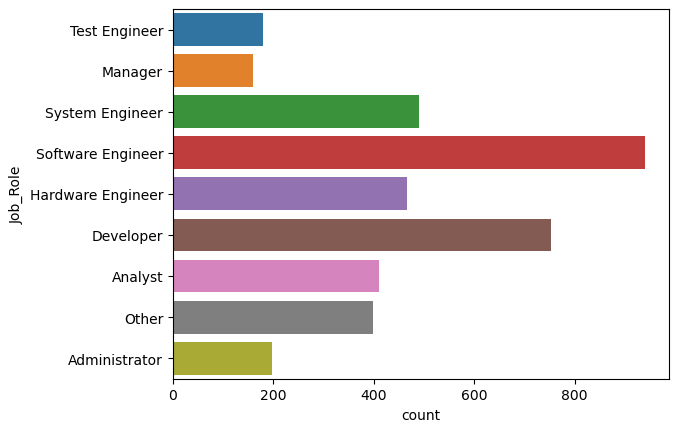

In [350]:
sns.countplot(y = 'Job_Role', data = df)

* By this analysis `Software Engineer` are more and second Highest is `Developer`
* From now onwards in the analysis we can use `Job_Role` instead `Designation`

## `JobCity` Column

In [279]:
df['JobCity'].value_counts()

Bengaluru           1126
Noida                390
Hyderabad            371
Pune                 327
Chennai              313
                    ... 
GANJAM                 1
GAZIABAAD              1
Dharuhera              1
Miryalaguda            1
ASIFABADBANGLORE       1
Name: JobCity, Length: 222, dtype: int64

* **JobCity having Highest cardinality**
* In JobCity more people are working in `Bengaluru` and second most is `Noida`

## `Gender` column

<Axes: xlabel='Gender', ylabel='count'>

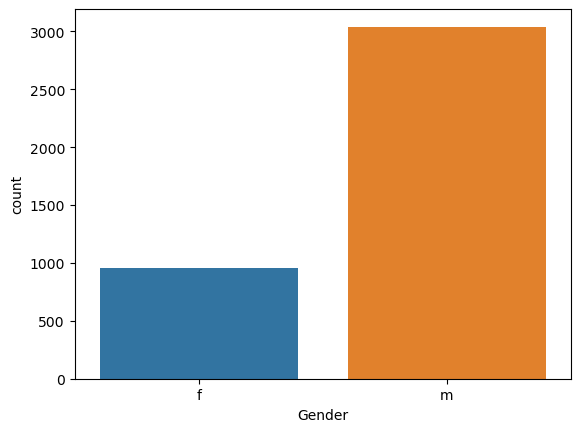

In [290]:
sns.countplot(x='Gender', data=df)

* **From the Gender column - proportion of Male are more compared to Female**
* The Proportion looks like `f : m = 1 : 3`

## `Specialization` Column

<Axes: xlabel='Specialization', ylabel='count'>

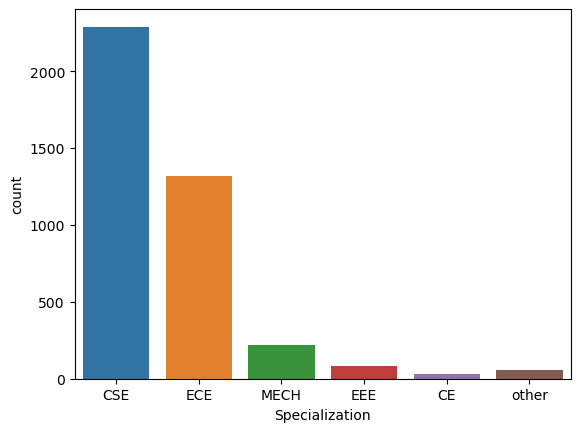

In [292]:
sns.countplot(x = 'Specialization', data = df)

* **Based on Specialization most of the people are from `CSE > ECE > MECH > EEE > CE > other`**

## `10board` & `12board` Columns

<Axes: xlabel='10board', ylabel='count'>

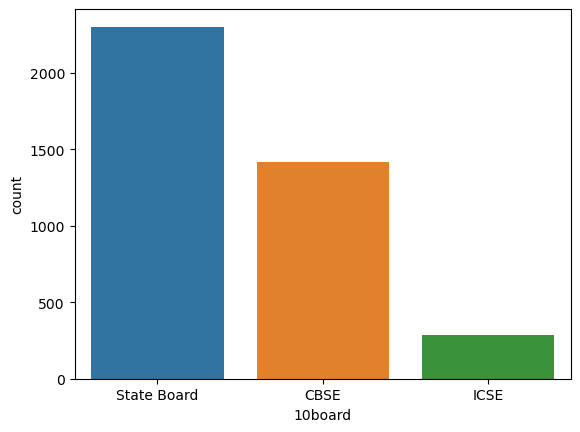

In [302]:
sns.countplot(x = "10board", data = df)

<Axes: xlabel='12board', ylabel='count'>

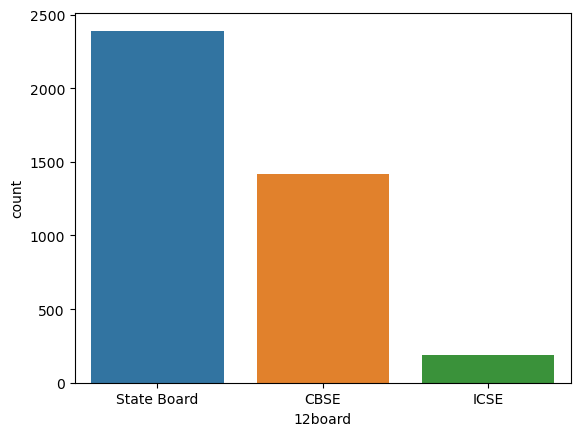

In [306]:
sns.countplot(data=df, x = '12board')

* **Based on `10board` & `12board` most of the people are from `State Board`, CBSE and Follwed by ICSE**

## `GradAge` Column

In [309]:
df['GradAge'].mode()

0    22
Name: GradAge, dtype: int64

* **People who are appearing For AMCAT exam - Most of the people are Completed their Graduation at the age of `21` Years**

## `AMCAT` - Scores

In [310]:
amcat_scores = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

In [311]:
np.round(df[amcat_scores].describe(), 2)

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00,3998.00
mean,501.65,501.60,513.38,0.61,353.10,95.33,90.74,22.97,16.48,31.85,2.68,-0.04,0.15,0.00,-0.17,-0.14
std,104.94,86.78,122.30,0.26,205.36,158.24,175.27,98.12,87.59,104.85,36.66,1.03,0.94,0.95,1.01,1.01
min,180.00,195.00,120.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-4.13,-5.78,-4.60,-2.64,-7.38
25%,425.00,445.00,430.00,0.41,295.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.71,-0.29,-0.60,-0.87,-0.67
50%,500.00,505.00,515.00,0.62,415.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.05,0.21,0.09,-0.23,-0.09
75%,570.00,565.00,595.00,0.84,495.00,233.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.70,0.81,0.67,0.53,0.50
max,875.00,795.00,900.00,1.00,840.00,612.00,715.00,623.00,676.00,548.00,516.00,2.00,1.90,2.54,3.35,1.82


In [312]:
df[amcat_scores].replace(-1, np.nan, inplace=True)

In [313]:
df[amcat_scores].describe().round()

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0
mean,502.0,502.0,513.0,1.0,353.0,95.0,91.0,23.0,16.0,32.0,3.0,-0.0,0.0,0.0,-0.0,-0.0
std,105.0,87.0,122.0,0.0,205.0,158.0,175.0,98.0,88.0,105.0,37.0,1.0,1.0,1.0,1.0,1.0
min,180.0,195.0,120.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-4.0,-6.0,-5.0,-3.0,-7.0
25%,425.0,445.0,430.0,0.0,295.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0
50%,500.0,505.0,515.0,1.0,415.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-0.0,-0.0
75%,570.0,565.0,595.0,1.0,495.0,233.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
max,875.0,795.0,900.0,1.0,840.0,612.0,715.0,623.0,676.0,548.0,516.0,2.0,2.0,3.0,3.0,2.0


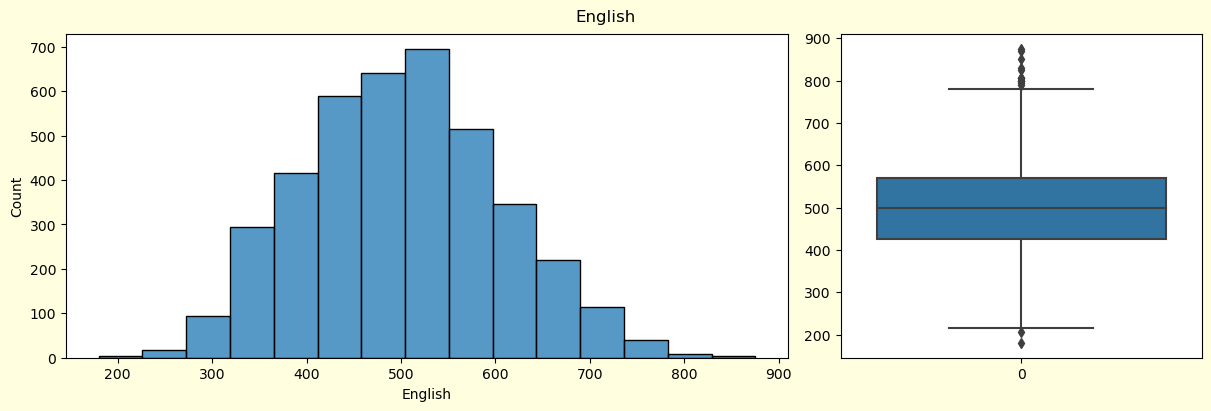

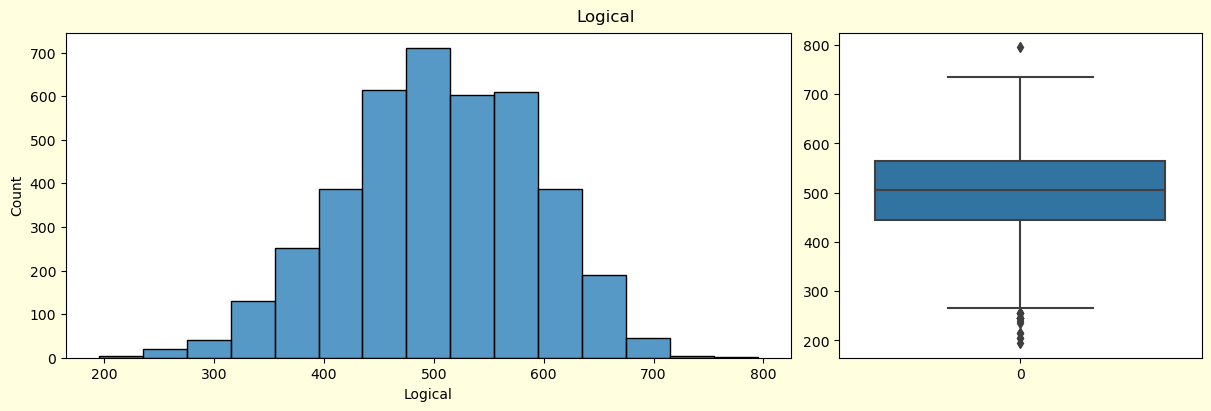

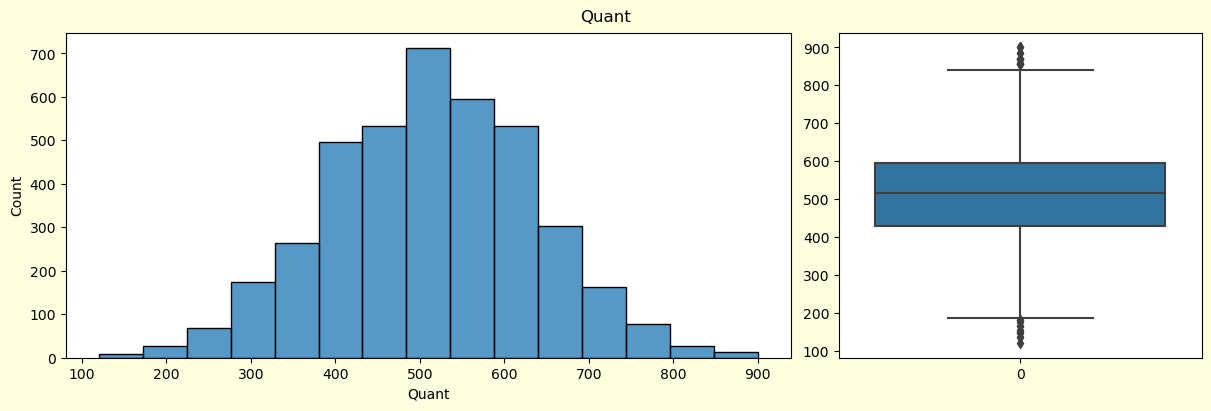

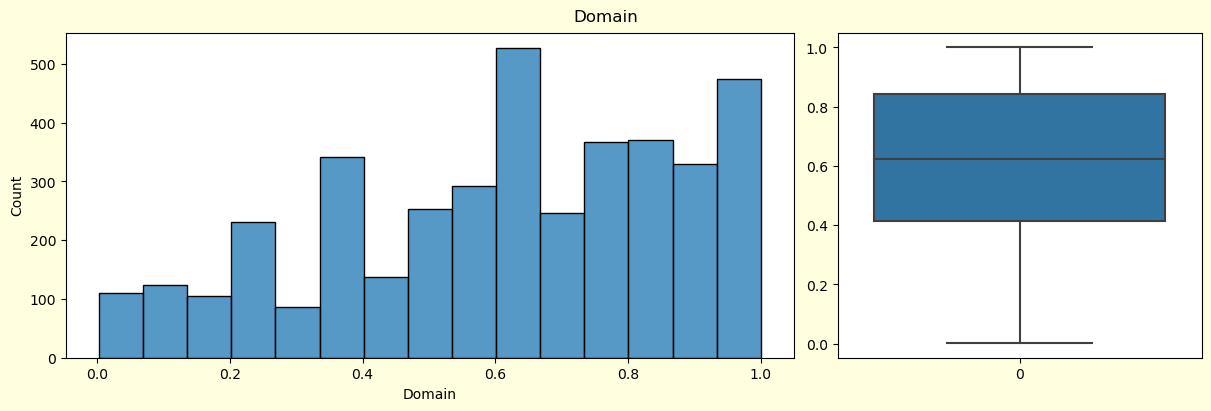

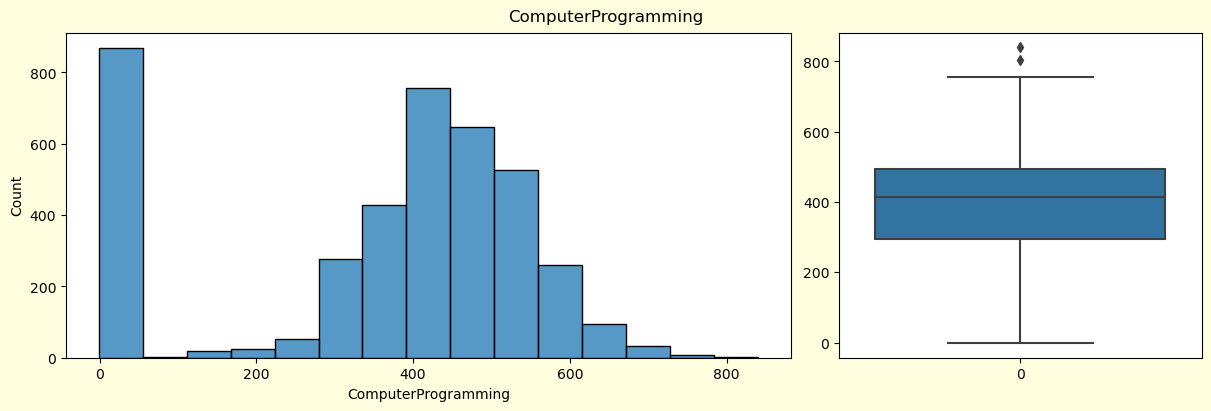

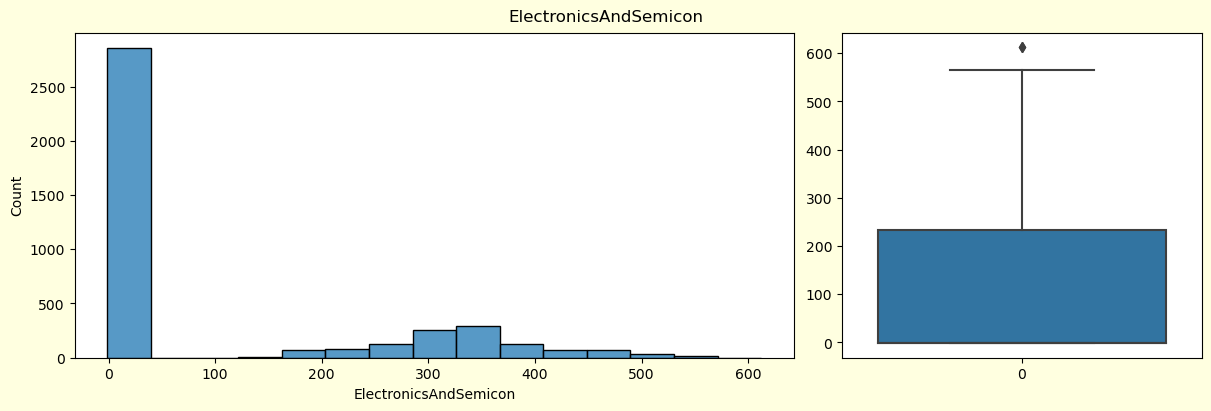

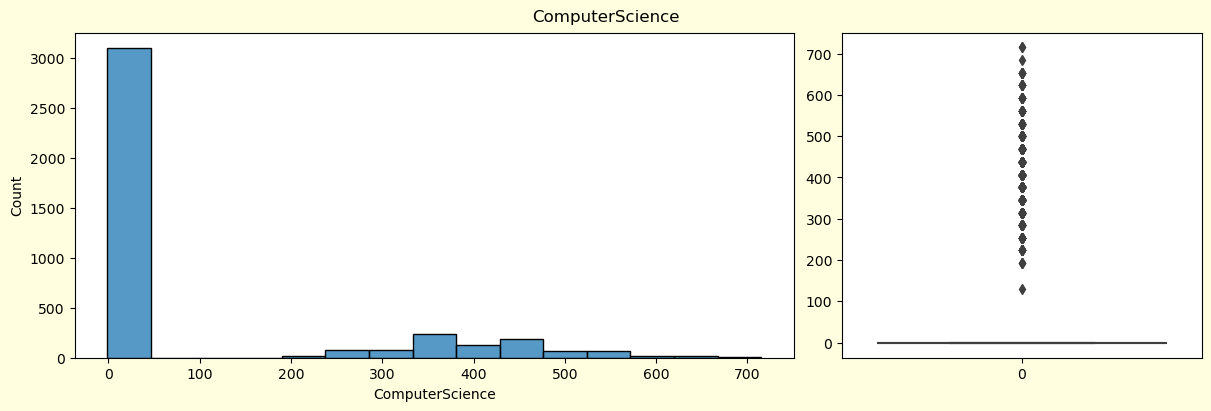

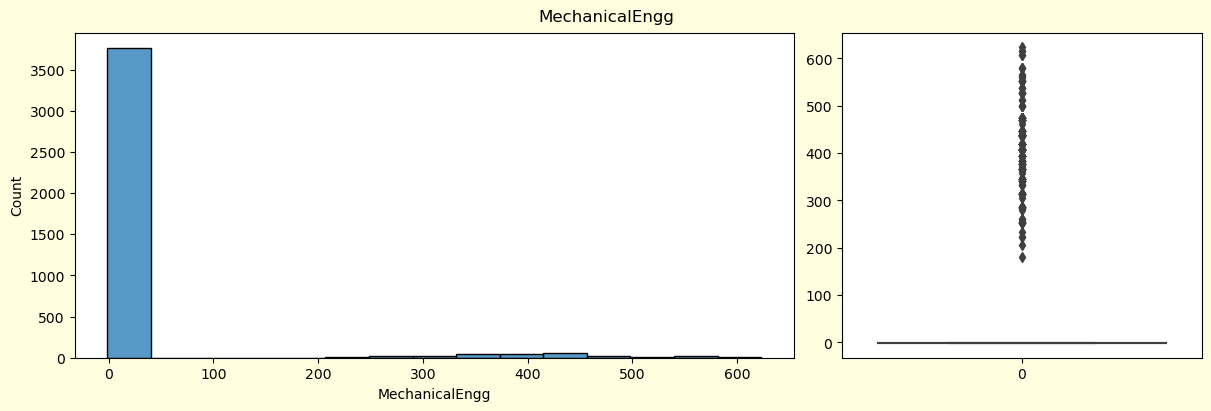

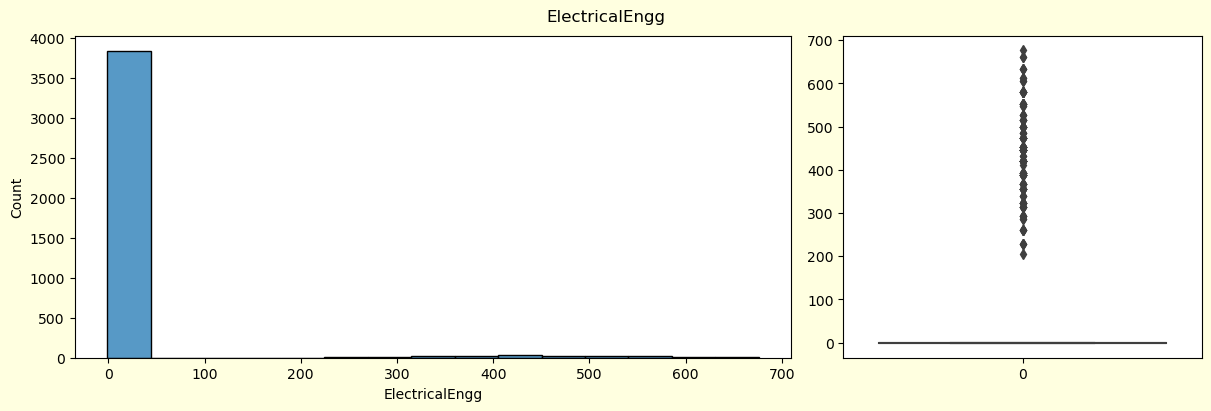

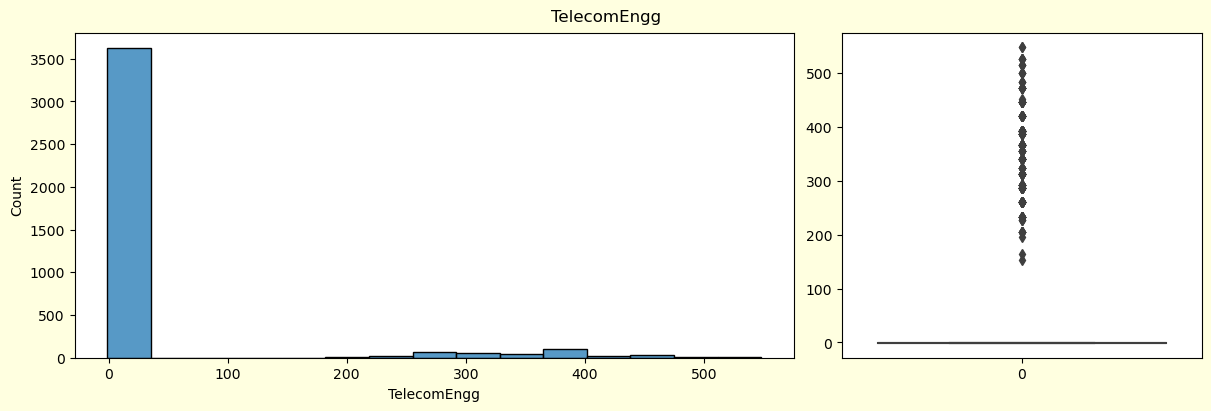

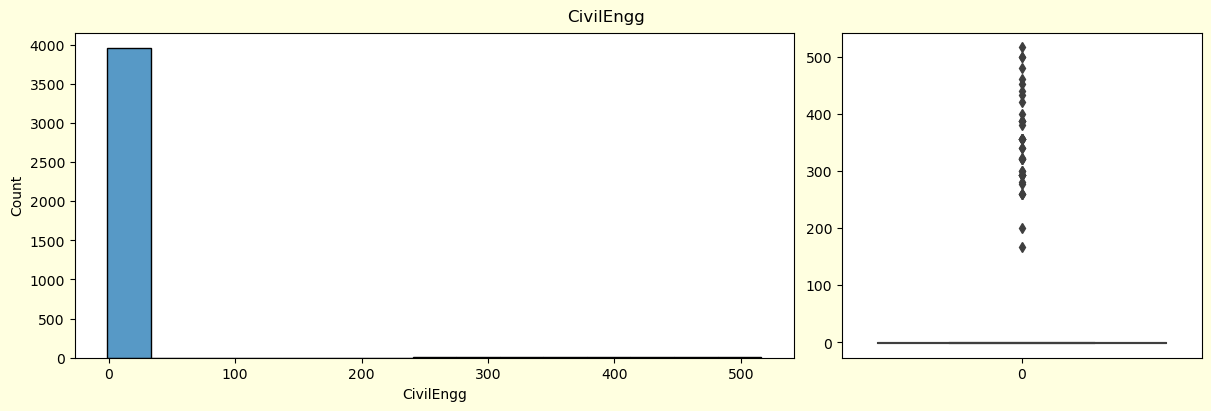

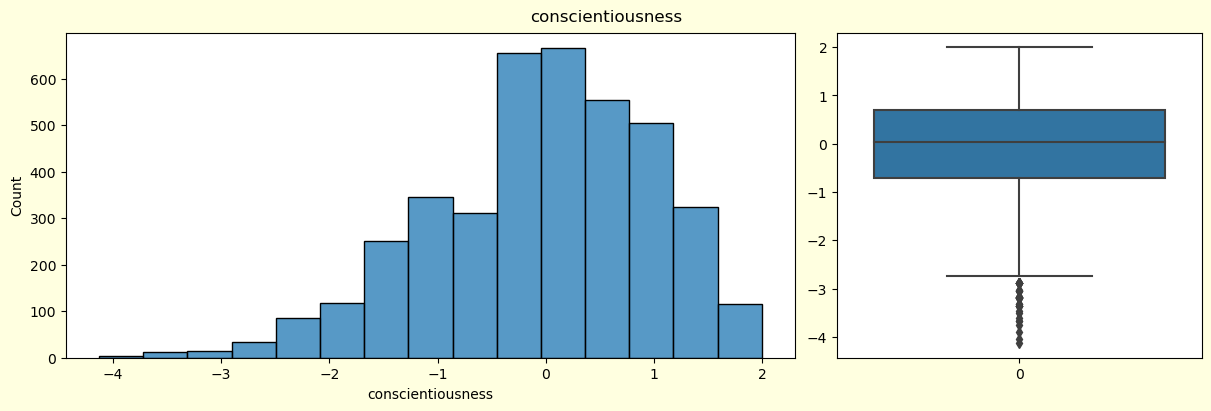

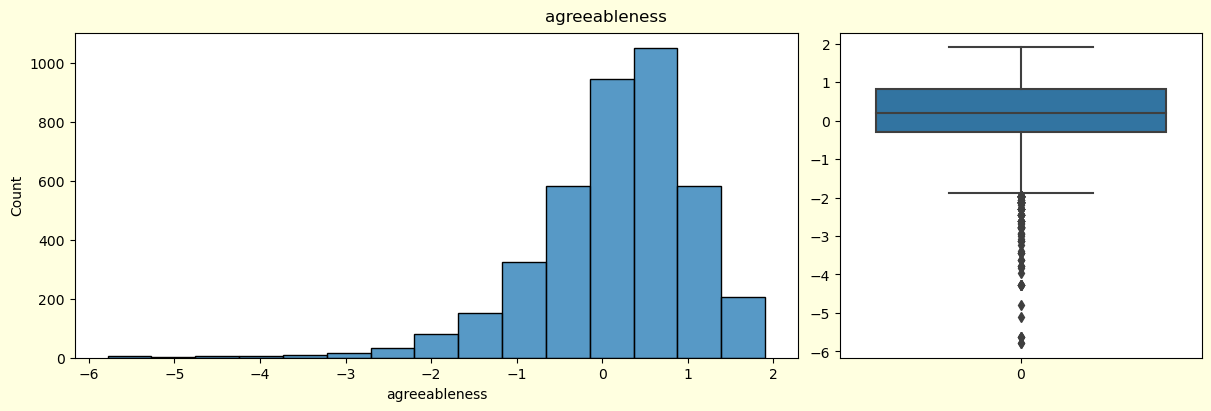

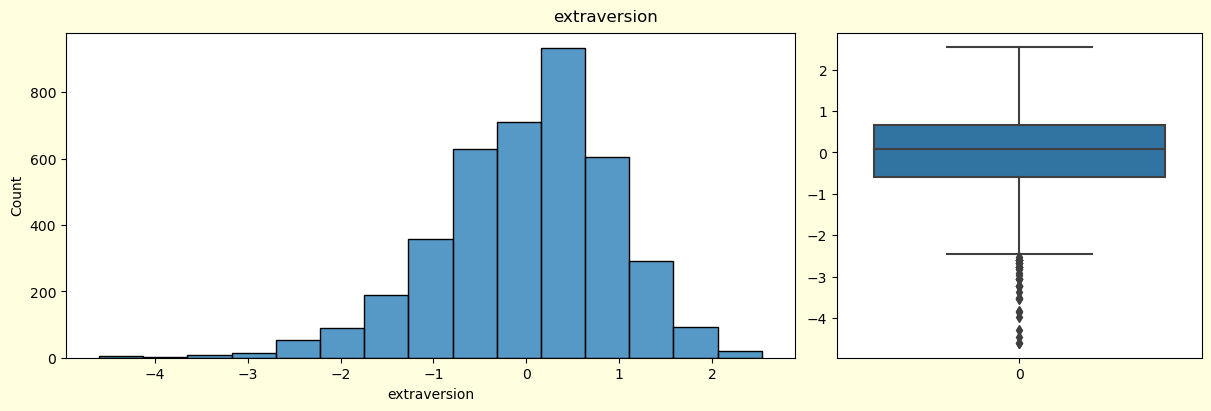

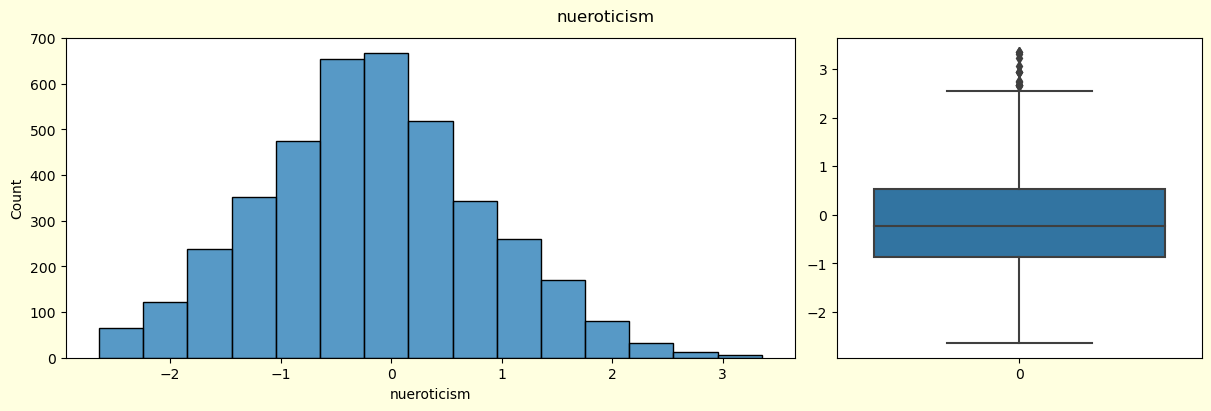

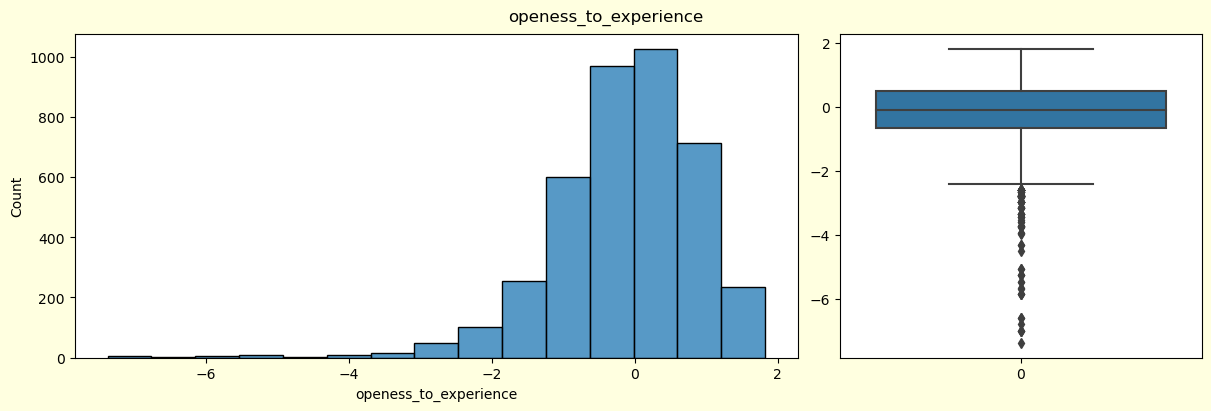

In [314]:
for col in amcat_scores: 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True, facecolor='lightyellow', gridspec_kw={'width_ratios': [4, 2]}) 
    sns.histplot(df[col], ax=ax1, bins=15) 
    sns.boxplot(df[col], ax=ax2) 
    plt.suptitle(col) 
    plt.show()

## `12graduation` Column

<Axes: >

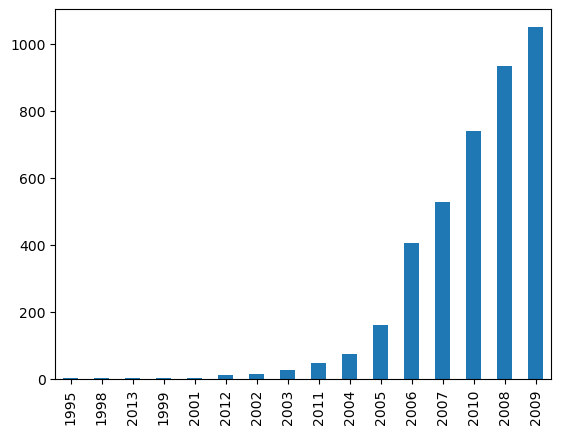

In [315]:
df['12graduation'].value_counts().sort_values().plot(kind='bar')

## `CollegeState` Column

<Axes: xlabel='count', ylabel='CollegeState'>

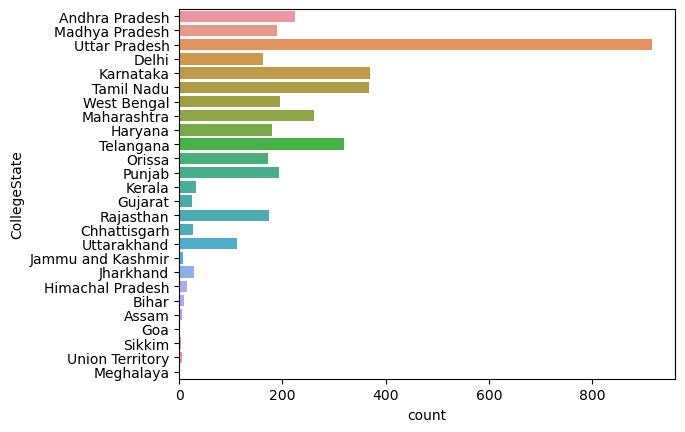

In [318]:
sns.countplot(y = 'CollegeState', data = df)

* **Most of the people are from UP, next Karnataka and Tamil Nadu**

## `Degree` Column

<Axes: xlabel='count', ylabel='Degree'>

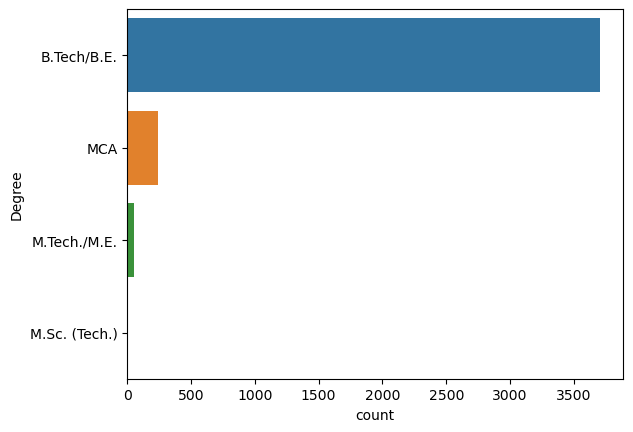

In [319]:
sns.countplot(y = 'Degree', data = df)

* **Most of the students are from B.Tech/B.E and second most is MCA**

## `DOB`, `DOJ`, `DOL` Columns

<Axes: >

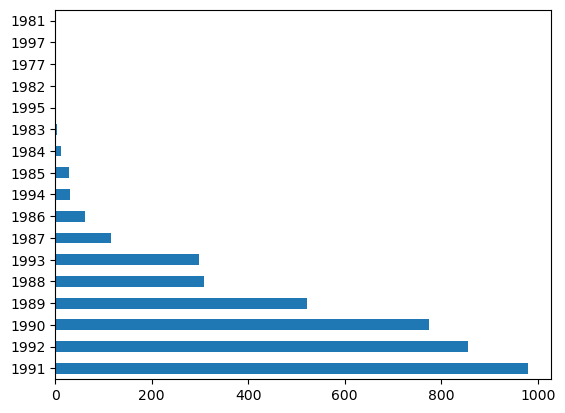

In [320]:
df['DOB'].dt.year.value_counts().plot(kind='barh')

<Axes: >

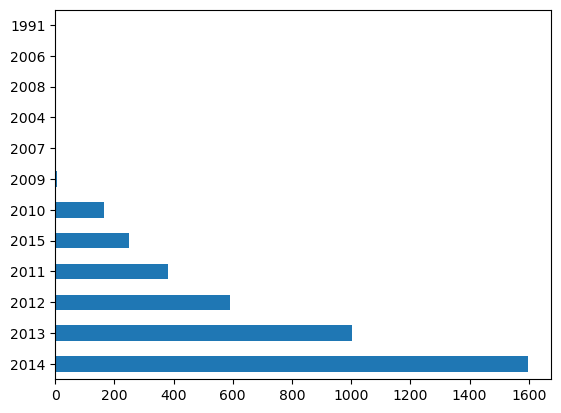

In [321]:
df['DOJ'].dt.year.value_counts().plot(kind='barh')

<Axes: >

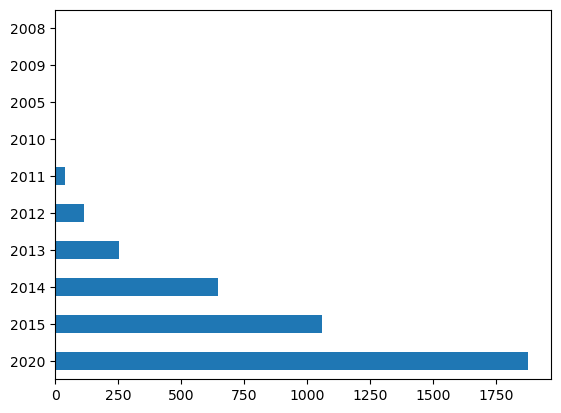

In [322]:
df['DOL'].dt.year.value_counts().plot(kind='barh')

## Bi Variate Analysis ✌

In [323]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'period', 'DOB_Year', 'GYear', '12GradAge', 'GradAge'],
      dtype='object')

## `Gender` vs `Specialization`
* **cat vs cat**

In [324]:
pd.crosstab(index=df['Gender'], columns=df['Specialization'])

Specialization,CE,CSE,ECE,EEE,MECH,other
Gender,,,,,,
f,6,601,306,17,12,15
m,23,1688,1013,68,208,41


<Axes: xlabel='Specialization', ylabel='count'>

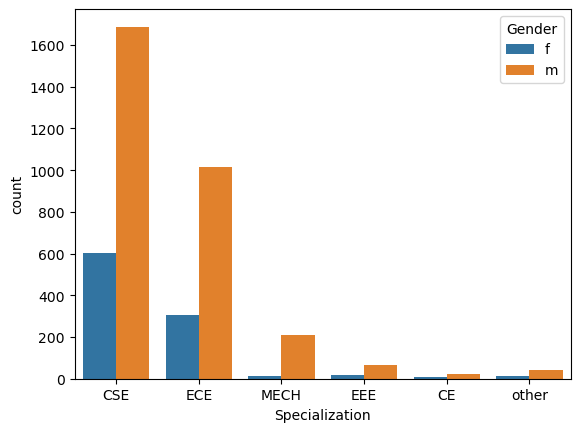

In [325]:
sns.countplot(data=df, x='Specialization', hue='Gender')

* **Observation:**
    1. By seeing the plot most of the Male are preferring CSE as their course than other course
    2. When compared to Male with Female, Male are More in every course than Female.
    3. Female are more intrested to opt CSE as their course as same as Male.
 

## `Gender` vs `10percentage`

In [326]:
df.groupby('Gender')['10percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,80.932894,8.848698,48.8,75.00,82.4,87.63,97.12
m,3041.0,76.979000,9.960078,43.0,70.66,78.0,85.00,97.76


<Axes: xlabel='10percentage', ylabel='Gender'>

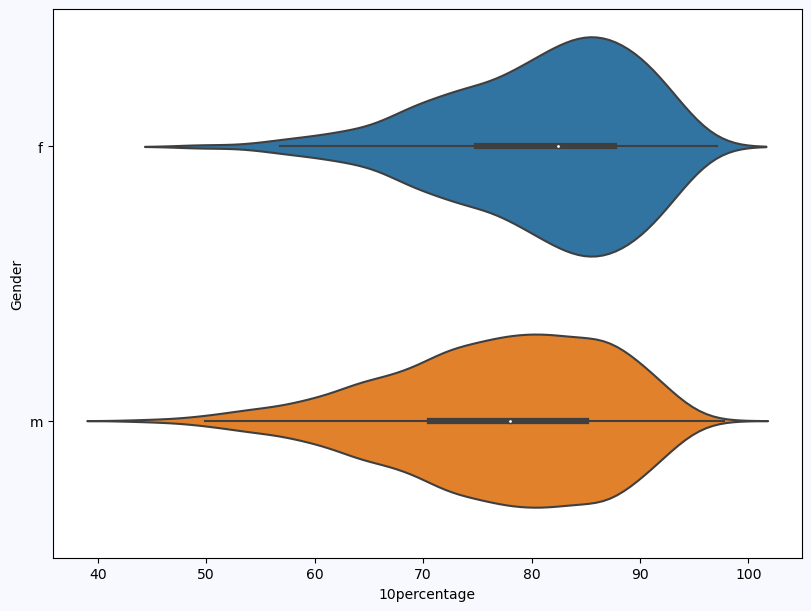

In [327]:
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True, facecolor='ghostwhite')
sns.violinplot(data=df, y='Gender', x='10percentage', ax=ax)

* **Observation:**
    * The two plots are right skewed, it means the students are performing in 10th exam are well.
    * Comparing Male with Female, Female performance is Good (i.e; Females are performed well in the exam) their 50th percentile is more than Male

## `Gender` vs `12percentage`

In [328]:
df.groupby('Gender')['12percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,77.007618,10.852544,43.12,69.16,77.0,85.6,98.2
m,3041.0,73.666636,10.926044,40.00,65.20,73.4,81.8,98.7


<Axes: xlabel='12percentage', ylabel='Gender'>

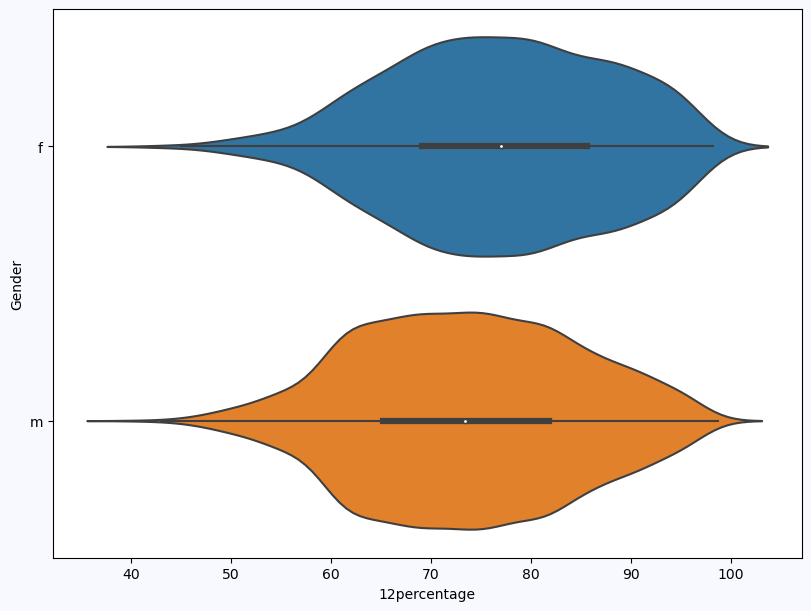

In [329]:
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True, facecolor='ghostwhite')
sns.violinplot(data=df, y='Gender', x='12percentage', ax=ax)

* **Observation:**
    * Here also we see the same patten as 10percentage.
    * The Distribution is again Right skewed, the students perform well on 12Board exam

## `Gender` vs `collegeGPA`

In [330]:
df.groupby('Gender')['collegeGPA'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,74.048056,7.266736,9.30,70.00,74.00,78.15,99.93
m,3041.0,70.679947,8.269352,6.45,65.63,70.66,75.70,98.40


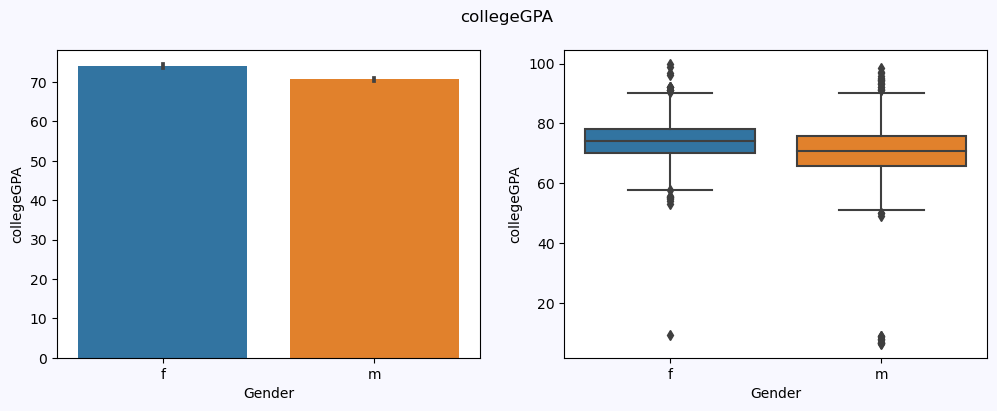

In [331]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), facecolor='ghostwhite')
sns.barplot(x='Gender', y='collegeGPA', data=df, ax=ax1)
sns.boxplot(x='Gender', y='collegeGPA', data=df, ax=ax2)
plt.suptitle('collegeGPA')
plt.show()

* **Observation:**
    * Male and Female performed well in the Exam.
    * 25th Percentile of the Male & Female are graterthan 65 GPA.
    * There are some people not performed well and we consider them as outliers.
    * Female have Higher GPA than Male.

## `Gender` vs `Degree`

In [332]:
pd.crosstab(index=df['Gender'], columns=df['Degree'])

Degree,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA
Gender,,,,
f,889,1,9,58
m,2811,1,44,185


<Axes: xlabel='Degree', ylabel='count'>

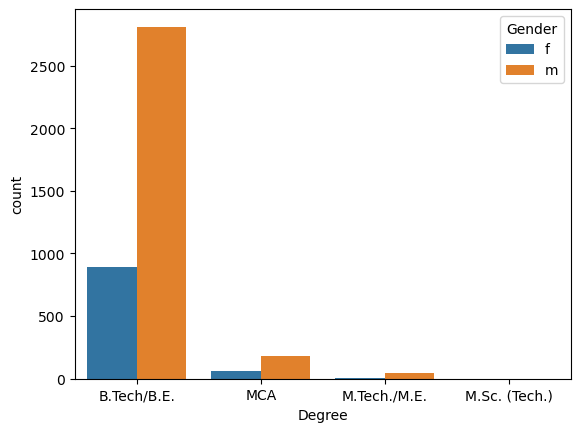

In [333]:
sns.countplot(data=df, x='Degree', hue='Gender')

* **Observation:**
    * Both Male and Female are opted their Degree course as B.Tech/B.E

## `Gender` vs `Job_Role`

In [351]:
pd.crosstab(index=df['Gender'], columns=df['Job_Role'])

Job_Role,Administrator,Analyst,Developer,Hardware Engineer,Manager,Other,Software Engineer,System Engineer,Test Engineer
Gender,,,,,,,,,
f,55,125,185,64,29,112,219,119,49
m,142,286,568,402,131,287,722,372,131


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Test Engineer'),
  Text(1, 0, 'Manager'),
  Text(2, 0, 'System Engineer'),
  Text(3, 0, 'Software Engineer'),
  Text(4, 0, 'Hardware Engineer'),
  Text(5, 0, 'Developer'),
  Text(6, 0, 'Analyst'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Administrator')])

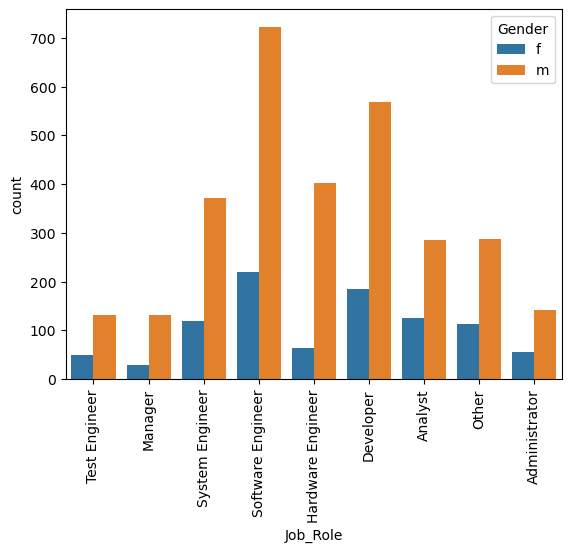

In [352]:
sns.countplot(data=df, x='Job_Role', hue='Gender')
plt.xticks(rotation=90)

* **Observation:**
    * Most of the people are doing job as Software Engineer, Developer and - - - - -

## `Gender` vs `Salary`

In [353]:
df.groupby('Gender')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,294937.304075,191031.789503,35000.0,200000.0,300000.0,355000.0,3500000.0
m,3041.0,311716.211772,218999.537438,35000.0,180000.0,300000.0,380000.0,4000000.0


<Axes: xlabel='Salary', ylabel='Gender'>

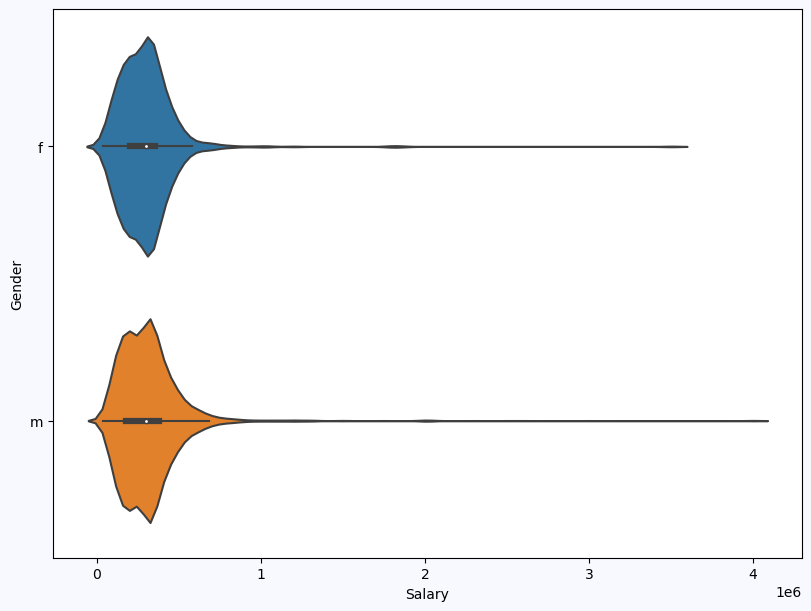

In [354]:
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True, facecolor='ghostwhite')
sns.violinplot(data=df, y='Gender', x='Salary', ax=ax)

* **Observation:**
    * There is a minute difference in the median salary between Female and Male, but it is hard to say whether this difference is significant or not.

## `Gender` vs `AMCAT scores`

****************************** Gender Vs English ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,501.91,100.66,250.0,430.0,500.0,570.0,870.0
m,3041.0,501.57,106.27,180.0,425.0,500.0,570.0,875.0


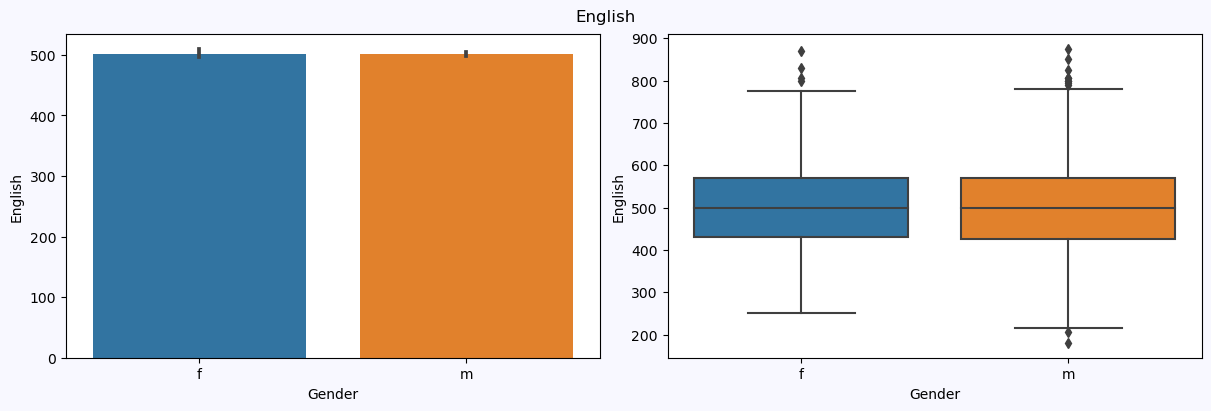


****************************** Gender Vs Logical ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,499.89,82.34,255.0,445.0,500.0,555.0,705.0
m,3041.0,502.14,88.14,195.0,445.0,505.0,565.0,795.0


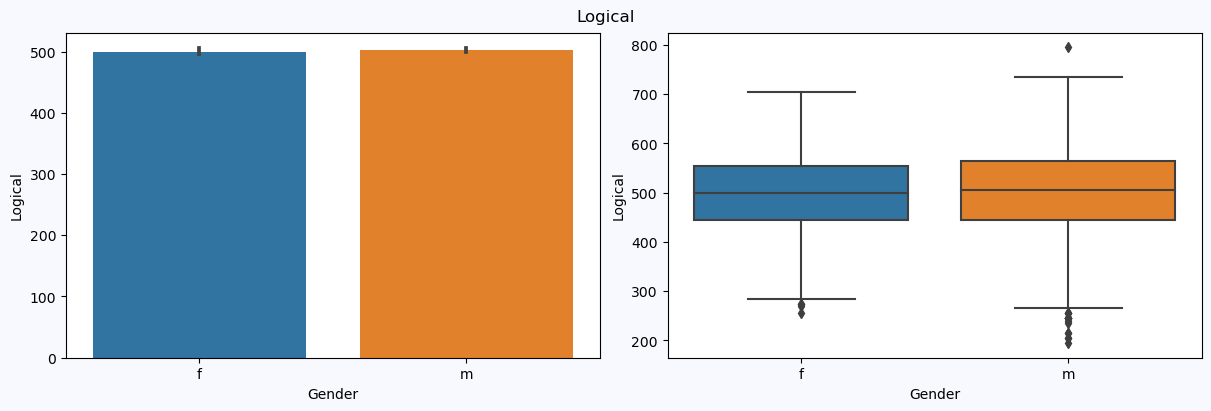


****************************** Gender Vs Quant ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,492.36,116.25,135.0,415.0,494.0,575.0,825.0
m,3041.0,519.99,123.43,120.0,435.0,525.0,605.0,900.0


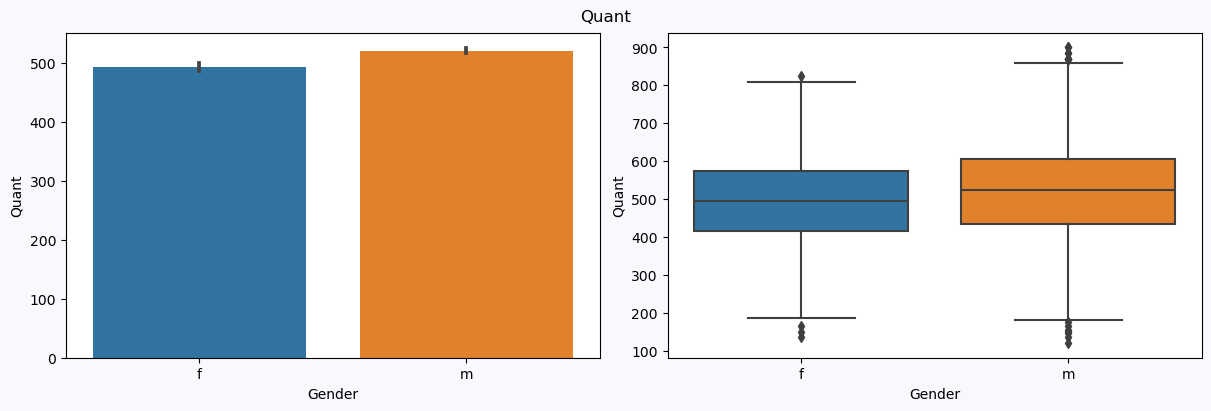


****************************** Gender Vs Domain ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,0.60,0.26,0.01,0.38,0.62,0.82,1.0
m,3041.0,0.61,0.27,0.00,0.41,0.62,0.84,1.0


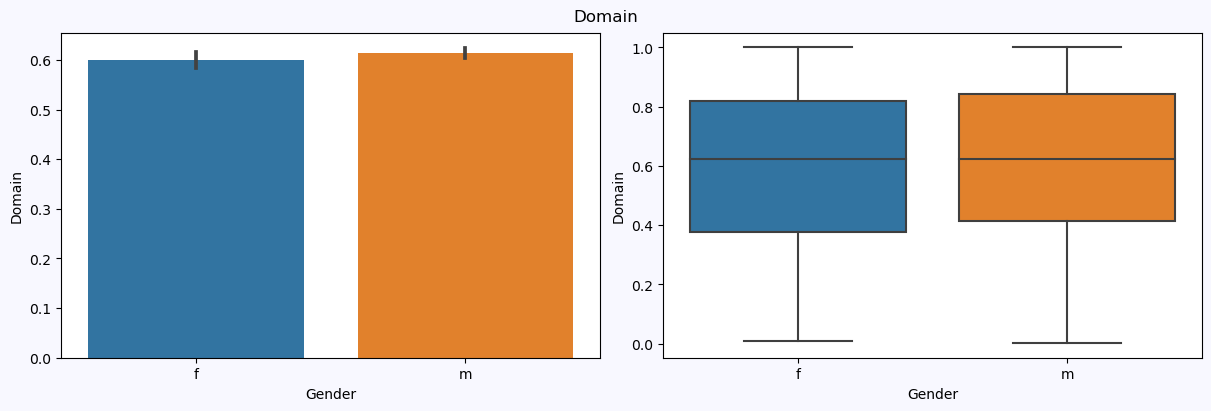


****************************** Gender Vs ComputerProgramming ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,362.54,185.67,-1.0,335.0,415.0,475.0,745.0
m,3041.0,350.13,211.11,-1.0,265.0,415.0,495.0,840.0


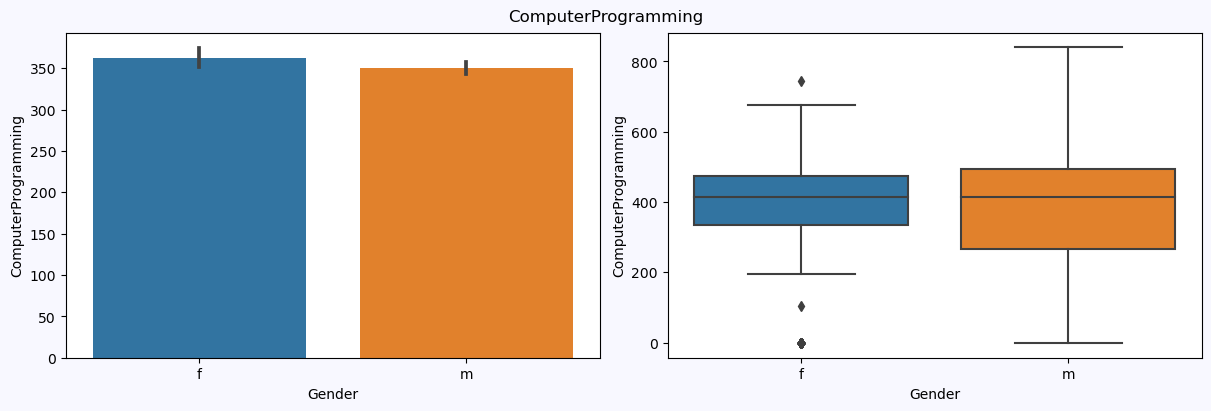


****************************** Gender Vs ElectronicsAndSemicon ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,91.79,154.41,-1.0,-1.0,-1.0,233.0,612.0
m,3041.0,96.44,159.44,-1.0,-1.0,-1.0,233.0,612.0


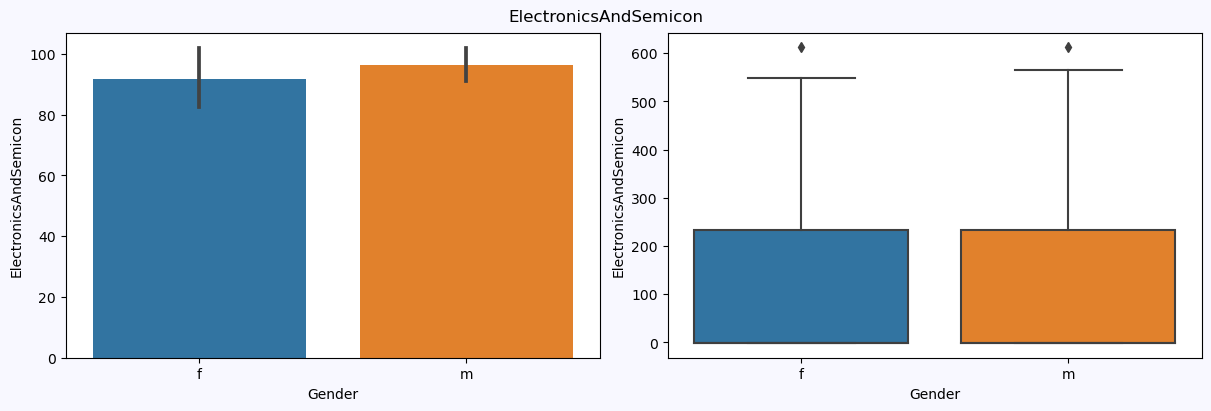


****************************** Gender Vs ComputerScience ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,91.5,174.39,-1.0,-1.0,-1.0,-1.0,715.0
m,3041.0,90.5,175.58,-1.0,-1.0,-1.0,-1.0,715.0


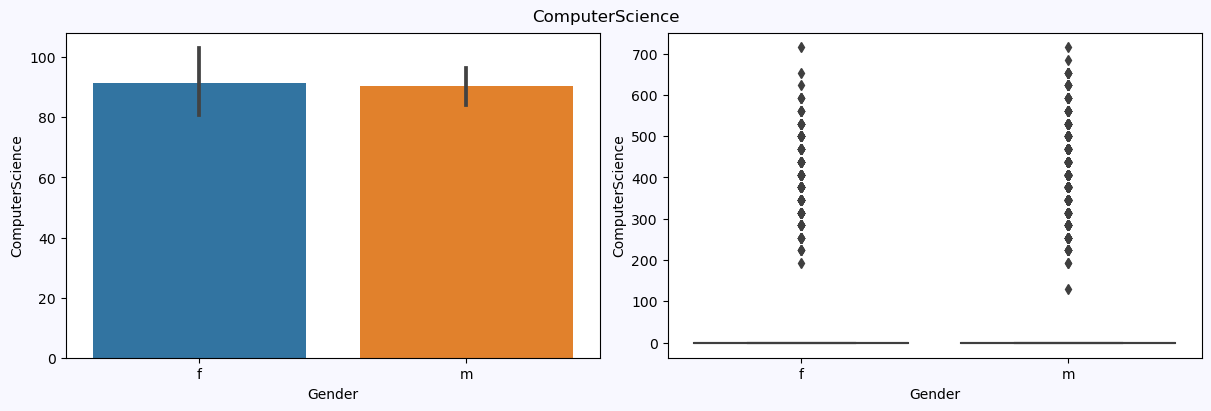


****************************** Gender Vs MechanicalEngg ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,6.46,56.30,-1.0,-1.0,-1.0,-1.0,606.0
m,3041.0,28.17,107.47,-1.0,-1.0,-1.0,-1.0,623.0


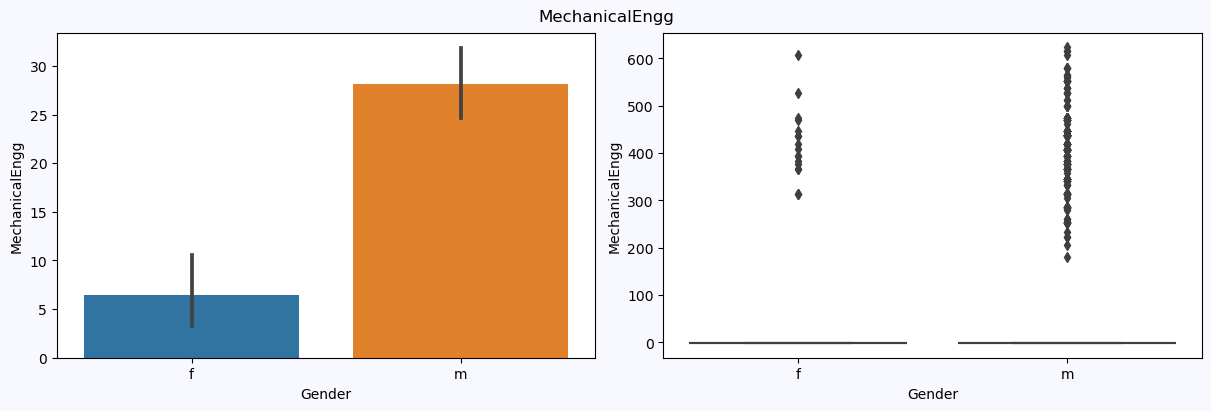


****************************** Gender Vs ElectricalEngg ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,12.07,75.27,-1.0,-1.0,-1.0,-1.0,633.0
m,3041.0,17.87,91.09,-1.0,-1.0,-1.0,-1.0,676.0


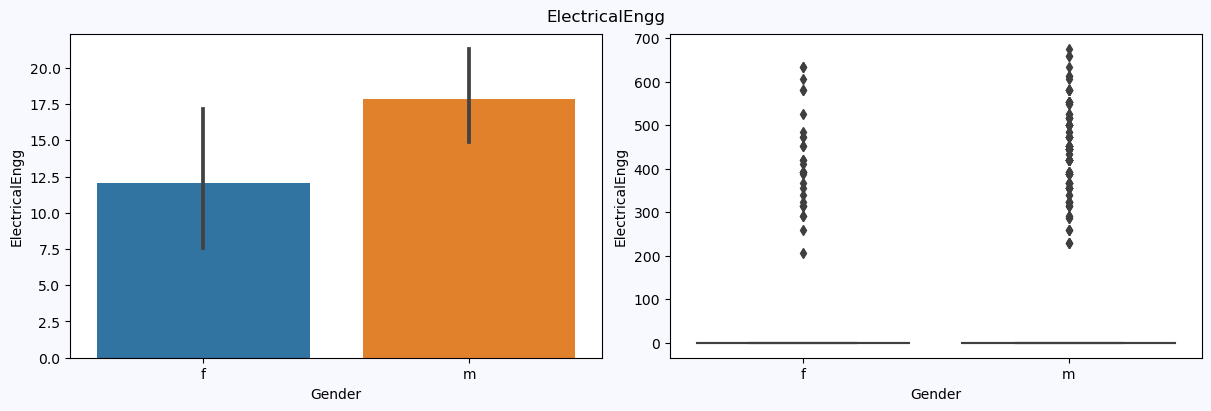


****************************** Gender Vs TelecomEngg ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,34.24,109.11,-1.0,-1.0,-1.0,-1.0,526.0
m,3041.0,31.10,103.48,-1.0,-1.0,-1.0,-1.0,548.0


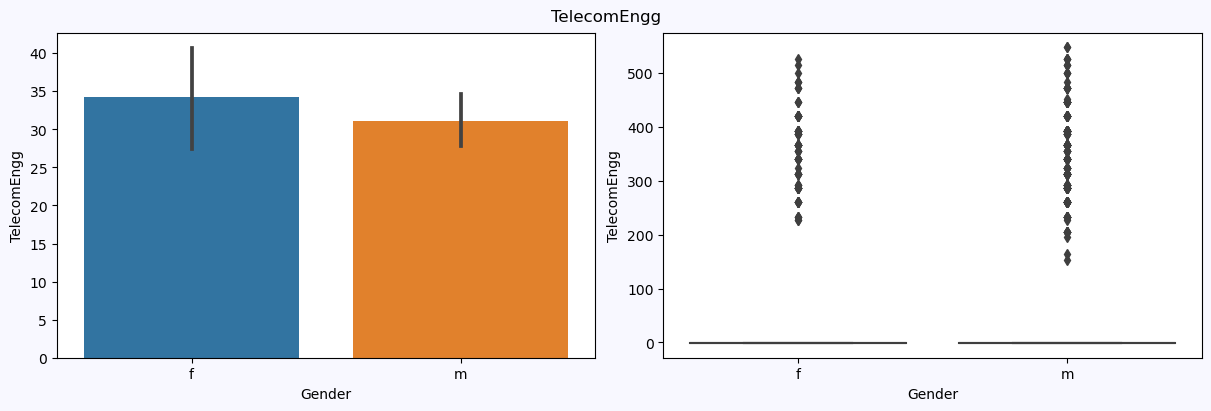


****************************** Gender Vs CivilEngg ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,1.84,33.52,-1.0,-1.0,-1.0,-1.0,500.0
m,3041.0,2.95,37.59,-1.0,-1.0,-1.0,-1.0,516.0


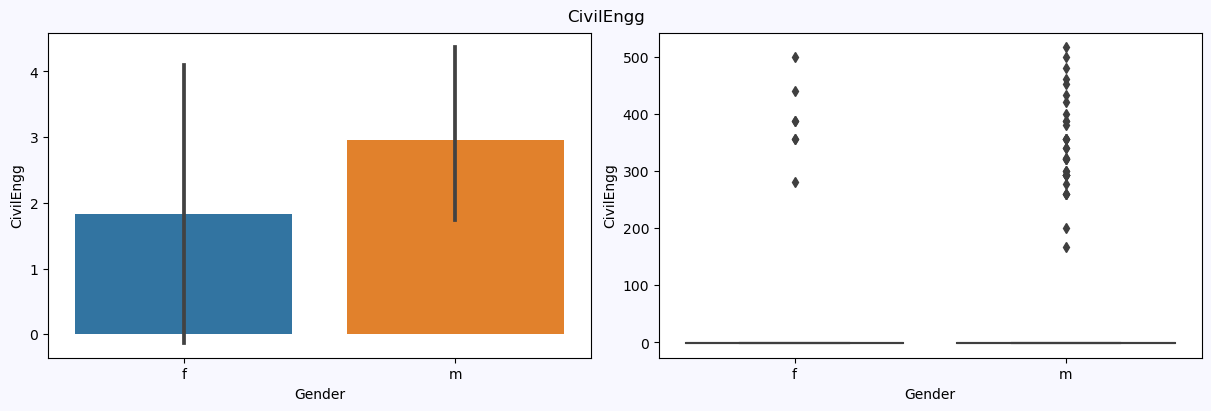


****************************** Gender Vs conscientiousness ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,0.12,0.95,-3.89,-0.45,0.27,0.85,2.0
m,3041.0,-0.09,1.05,-4.13,-0.73,-0.02,0.70,2.0


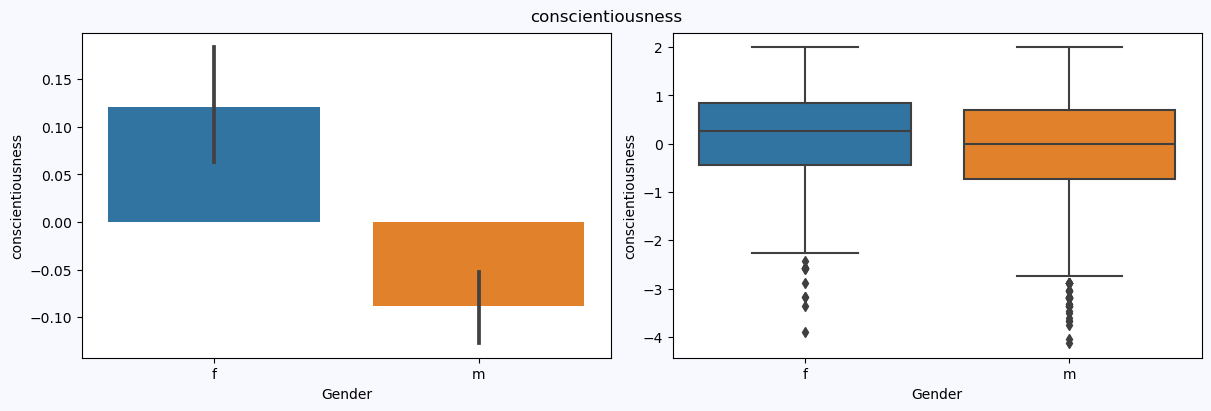


****************************** Gender Vs agreeableness ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,0.29,0.89,-5.62,-0.20,0.38,0.88,1.9
m,3041.0,0.10,0.95,-5.78,-0.44,0.21,0.71,1.9


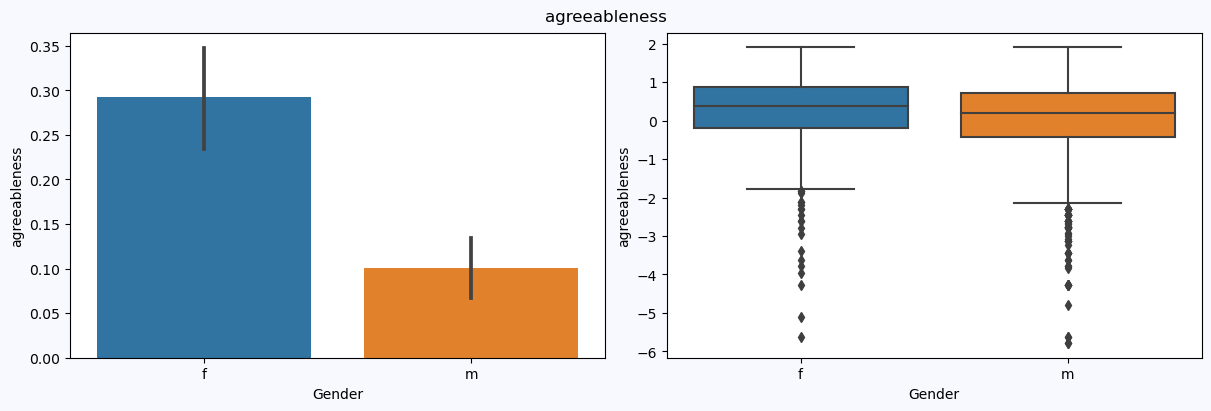


****************************** Gender Vs extraversion ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,0.01,0.94,-3.99,-0.6,0.09,0.67,2.16
m,3041.0,-0.00,0.95,-4.60,-0.6,0.09,0.62,2.54


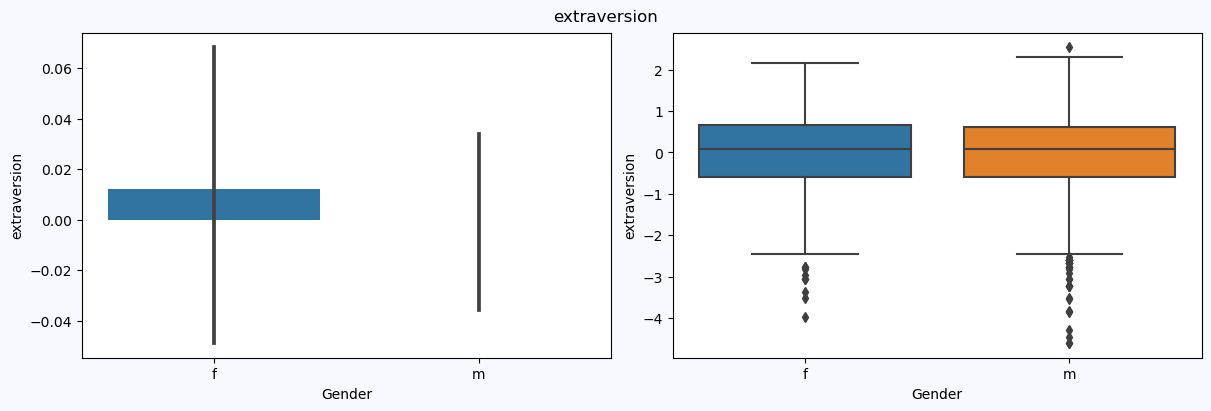


****************************** Gender Vs nueroticism ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,-0.18,1.01,-2.64,-0.88,-0.23,0.53,2.76
m,3041.0,-0.17,1.01,-2.64,-0.87,-0.17,0.53,3.35


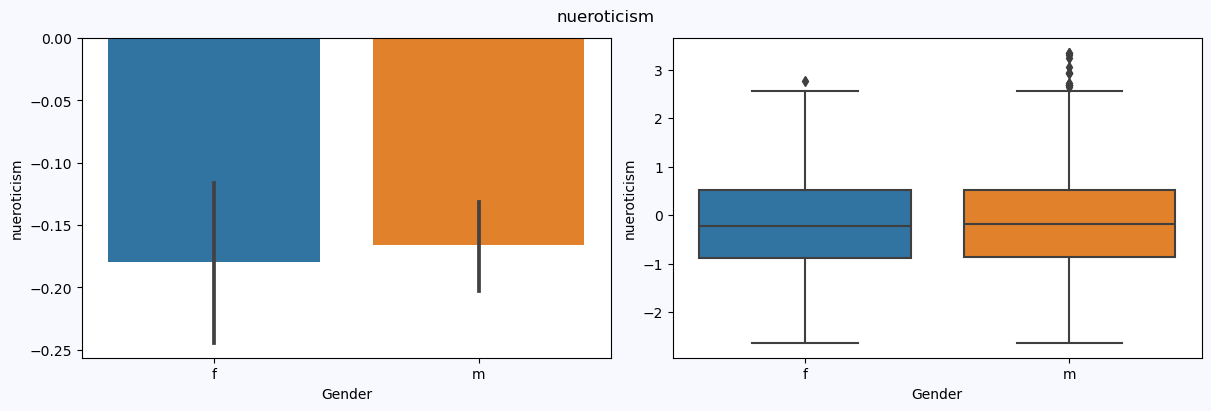


****************************** Gender Vs openess_to_experience ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,0.04,0.94,-6.61,-0.45,0.10,0.67,1.82
m,3041.0,-0.19,1.02,-7.38,-0.67,-0.09,0.48,1.63


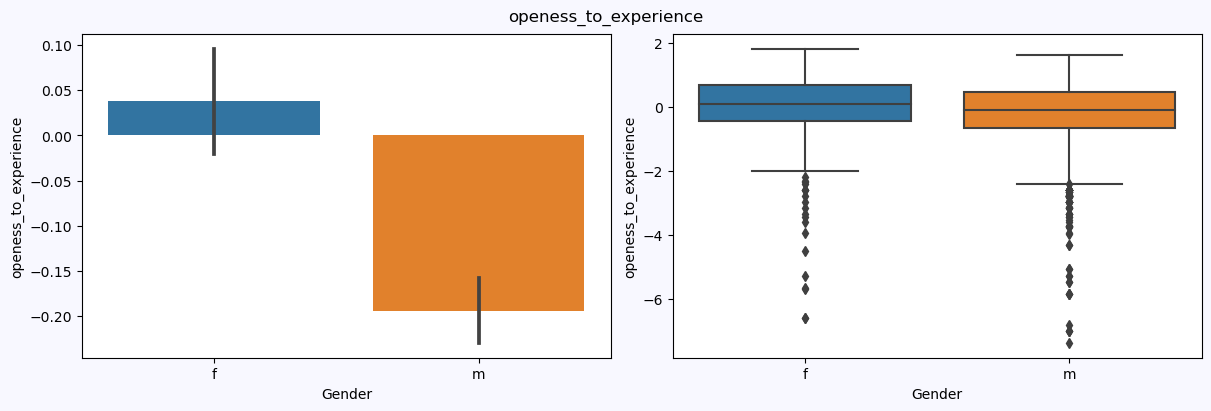

In [355]:
for col in amcat_scores:
    print('*'*30,'Gender Vs',col, '*'*30)
    display(df.groupby('Gender')[col].describe().round(2))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), facecolor='ghostwhite', constrained_layout=True)
    sns.barplot(x='Gender', y=col, data=df, ax=ax1)
    sns.boxplot(x='Gender', y=col, data=df, ax=ax2)
    plt.suptitle(col)
    plt.show()
    print()

* **Observation:**
| Field                              | Gender Score Differences        |
|------------------------------------|---------------------------------|
| English                            | Minor                           |
| Logical                            | Minor                           |
| Quantitative                       | Minor                           |
| Domain                             | Minor                           |
| Computer Programming               | Minor                           |
| Electronics and Semiconductor Eng. | Minor                           |
| Computer Science                   | Minor                           |
| Mechanical Engineering             | Minor                           |
| Telecommunication Engineering     | Minor                           |
| Civil Engineering                  | Women outperform men            |
| Electrical Engineering             | Men tend to excel               |

## `CollegeTier` vs `CollegeGPA`

In [356]:
df.groupby('CollegeTier')['collegeGPA'].describe()

,count,mean,std,min,25%,50%,75%,max
CollegeTier,,,,,,,,
1,297.0,73.987845,9.503475,8.58,69.40,74.30,79.29,99.93
2,3701.0,71.285415,8.018223,6.45,66.02,71.36,76.08,99.00


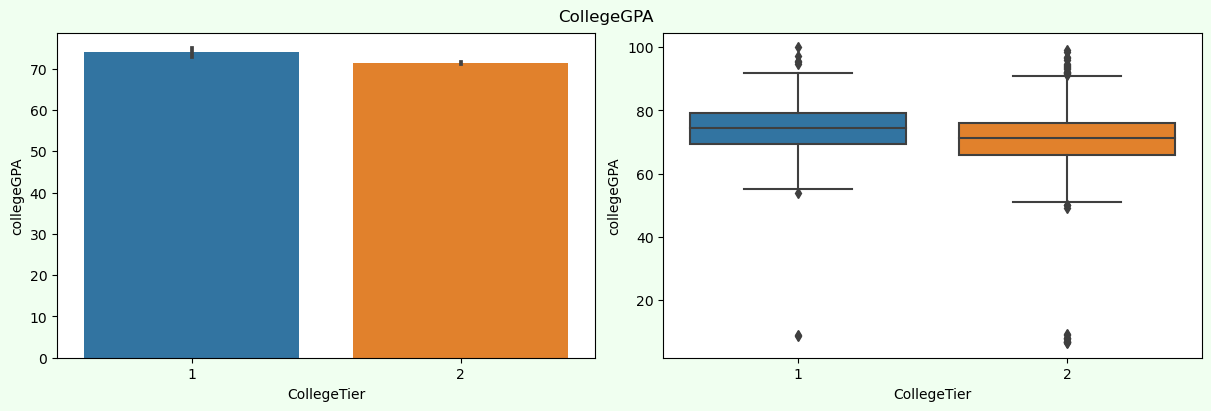

In [357]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True, facecolor='honeydew')
sns.barplot(x='CollegeTier', y='collegeGPA', data=df, ax=ax1)
sns.boxplot(x='CollegeTier', y='collegeGPA', data=df, ax=ax2)
plt.suptitle('CollegeGPA')
plt.show()

* **Observation:**
    * Tier-1 college students Performance is slightly high compared to Tire-2

## `Salary` vs `Job`

In [358]:
df.groupby('Job_Role')['Salary'].describe().round(2).sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Job_Role,,,,,,,,
Administrator,197.0,230177.66,120526.46,60000.0,150000.0,200000.0,255000.0,910000.0
Other,399.0,244837.09,227884.44,40000.0,142500.0,200000.0,275000.0,2000000.0
Developer,753.0,267994.69,221494.33,35000.0,135000.0,240000.0,340000.0,3000000.0
Hardware Engineer,466.0,291083.69,172999.64,50000.0,180000.0,265000.0,355000.0,1860000.0
Analyst,411.0,317335.77,158333.61,50000.0,205000.0,305000.0,360000.0,2020000.0
Test Engineer,180.0,329022.22,314984.92,60000.0,180000.0,310000.0,400000.0,4000000.0
Software Engineer,941.0,348512.22,223980.47,50000.0,240000.0,315000.0,400000.0,4000000.0
System Engineer,491.0,353879.84,180654.33,35000.0,310000.0,330000.0,412500.0,3500000.0
Manager,160.0,364687.50,225009.22,50000.0,210000.0,312500.0,442500.0,1320000.0


In [359]:
order = df.groupby('Job_Role')['Salary'].mean().sort_values().index

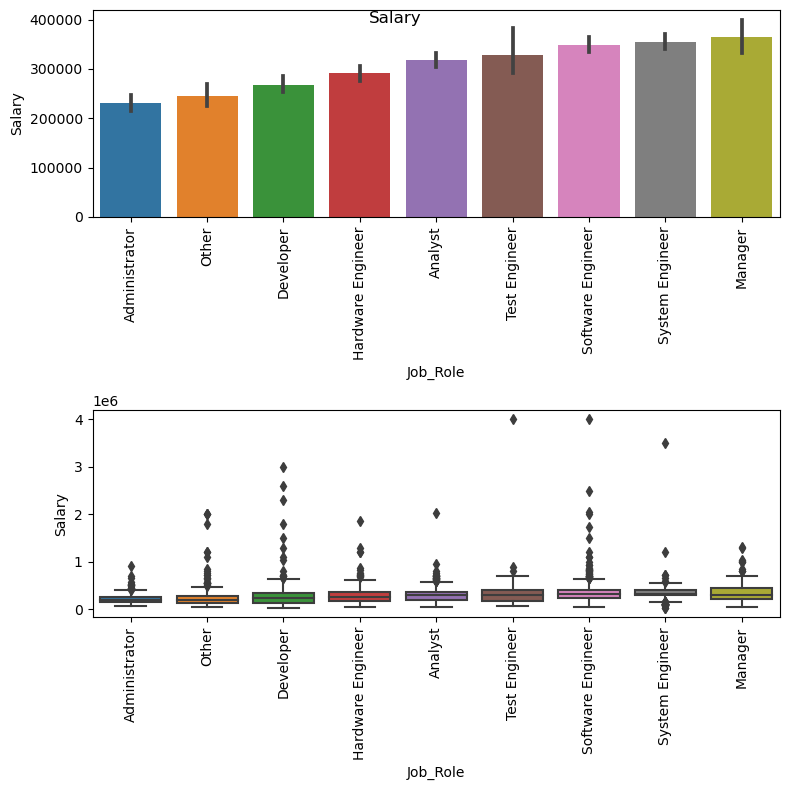

In [360]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.barplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax1)
sns.boxplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.suptitle('Salary')
plt.show()

* **Observation:**
    * By the above graph `Managers` are Earning More than others.
    * The second Most Earner from the plot is `System Engineer`

## `Salary` vs `CollegeTier`

In [361]:
df.groupby('CollegeTier')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
CollegeTier,,,,,,,,
1,297.0,442356.902357,312169.285374,100000.0,315000.0,360000.0,500000.0,4000000.0
2,3701.0,296893.812483,198800.849194,35000.0,180000.0,300000.0,360000.0,4000000.0


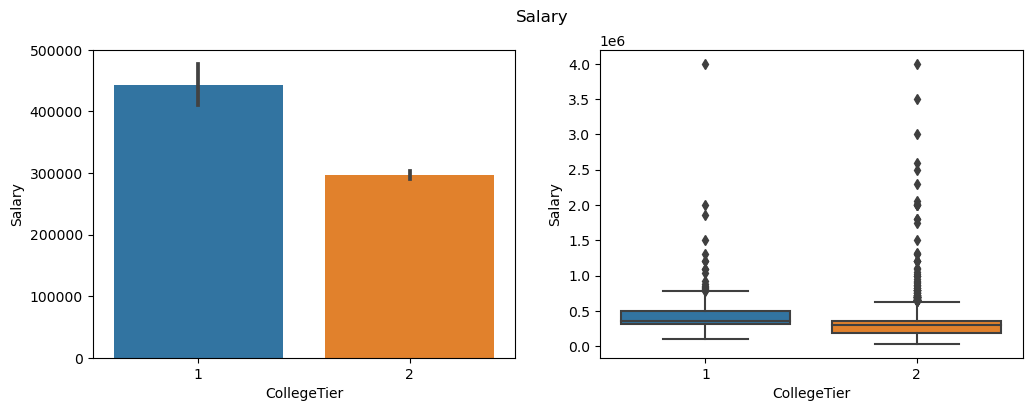

In [362]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='Salary', data=df, ax=ax1)
sns.boxplot(x='CollegeTier', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

* **Observation:**
    * The people who are from Tier-1 college are Earning More as compared to Tire-2

## `Salary` vs `Specialization`

In [363]:
df.groupby('Specialization')['Salary'].describe().round(1).sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Specialization,,,,,,,,
EEE,85.0,289529.4,213651.1,40000.0,180000.0,265000.0,340000.0,1860000.0
ECE,1319.0,298798.3,189421.4,40000.0,190000.0,300000.0,350000.0,3000000.0
MECH,220.0,310836.4,206893.2,60000.0,180000.0,267500.0,391250.0,1300000.0
CSE,2289.0,312020.5,226690.8,35000.0,180000.0,300000.0,385000.0,4000000.0
other,56.0,317946.4,162941.1,100000.0,180000.0,317500.0,400000.0,730000.0
CE,29.0,381206.9,190528.7,110000.0,295000.0,320000.0,415000.0,800000.0


In [364]:
order = df.groupby('Specialization')['Salary'].mean().sort_values().index

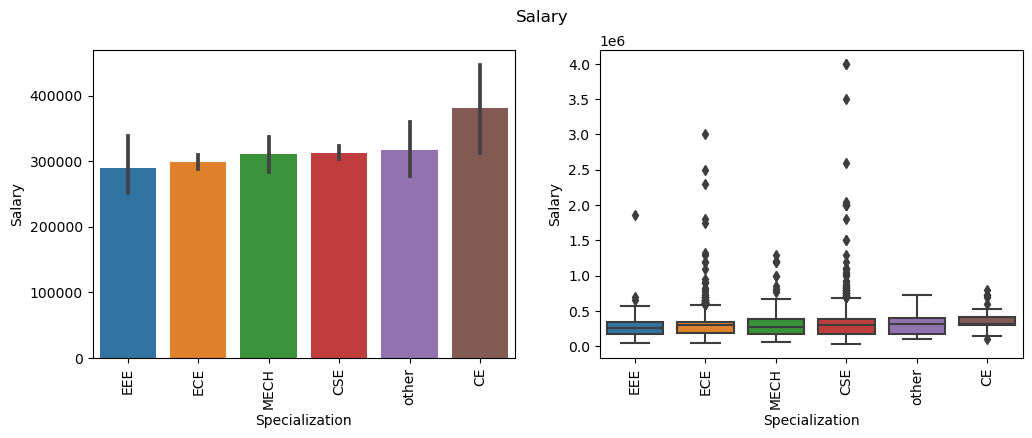

In [365]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Specialization', y='Salary', data=df, order=order, ax=ax1)
sns.boxplot(x='Specialization', y='Salary', data=df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.suptitle('Salary')
plt.show()


* **Observation:**
    * CSE people are earning more as compared to other students

## `Salary` vs `Degree`

In [366]:
df.groupby('Degree')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Degree,,,,,,,,
B.Tech/B.E.,3700.0,308622.702703,203358.186090,35000.0,190000.0,300000.0,370000.0,4000000.0
M.Sc. (Tech.),2.0,320000.000000,197989.898732,180000.0,250000.0,320000.0,390000.0,460000.0
M.Tech./M.E.,53.0,366132.075472,301422.335815,40000.0,180000.0,340000.0,440000.0,1860000.0
MCA,243.0,280802.469136,306936.465540,50000.0,145000.0,220000.0,330000.0,4000000.0


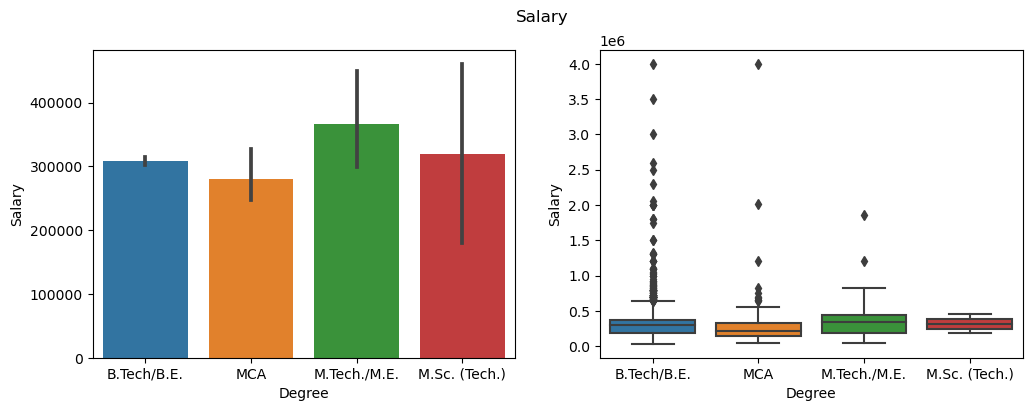

In [367]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Degree', y='Salary', data=df, ax=ax1)
sns.boxplot(x='Degree', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

* **Observation:**
    * M.Tech/M.E students are earning More than others, but B.Tech/B.E Students having more chances to earn better than M.Tech Students.

## Statistical Tests

### Research Questions
- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware
Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”
Test this claim with the data given to you.
- Is there a relationship between gender and specialization? (i.e. Does the preference of
Specialisation depend on the Gender?)
 
* **Let's Verify the claim**
* **Defining hypothesis**  |

|Hypothesis|Description|
|:---| :---|
|Null Hypothesis (H0)|μ = 250k - 300k|
|Alternate Hypothesis (H1)|μ != 250k - 300k|

In [368]:
df['Job_Role'].unique()

array(['Test Engineer', 'Manager', 'System Engineer', 'Software Engineer',
       'Hardware Engineer', 'Developer', 'Analyst', 'Other',
       'Administrator'], dtype=object)

In [369]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assistant s

In [370]:
filtered_df = df[df['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]
filtered_df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,period,DOB_Year,GYear,12GradAge,GradAge,Job_Role
19,466888,325000.0,2014-09-01,2020-03-20,software engineer,Pune,f,1990-11-30,79.00,CBSE,2008,62.20,CBSE,7977,2,B.Tech/B.E.,CSE,76.30,7977,0,Uttar Pradesh,2012-01-01 01:00:00-01:00,485,445,435,0.864685,525,-1,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295,6,1990,2012,18,22,Software Engineer
20,140069,320000.0,2010-11-01,2012-01-09,software engineer,Bengaluru,f,1988-07-25,91.20,State Board,2006,84.63,State Board,4437,2,B.Tech/B.E.,CSE,78.15,4437,0,Karnataka,2010-01-01 01:00:00-01:00,455,535,445,0.635979,445,-1,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444,2,1988,2010,18,22,Software Engineer
21,339689,200000.0,2012-08-01,2013-01-12,software engineer,Bengaluru,f,1991-08-20,75.67,State Board,2007,74.40,State Board,11368,2,B.Tech/B.E.,CSE,74.01,11368,0,Uttar Pradesh,2012-01-01 01:00:00-01:00,385,555,445,0.635979,445,-1,-1,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,1,1991,2012,16,21,Software Engineer
24,963123,335000.0,2014-06-01,2015-01-06,programmer analyst,Hyderabad,m,1993-06-28,88.00,State Board,2010,90.00,State Board,9173,2,B.Tech/B.E.,CSE,76.00,9173,1,Telangana,2014-01-01 01:00:00-01:00,625,555,630,0.356536,475,-1,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692,1,1993,2014,17,21,Analyst
31,1094324,340000.0,2014-08-01,2015-01-04,software engineer,Bengaluru,m,1992-10-23,77.20,State Board,2010,86.10,State Board,7282,2,B.Tech/B.E.,CSE,71.00,7282,0,Tamil Nadu,2014-01-01 01:00:00-01:00,560,485,450,0.622643,485,-1,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889,1,1992,2014,18,22,Software Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,212055,550000.0,2013-07-01,2014-01-04,software engineer,Bengaluru,m,1989-07-22,69.16,State Board,2006,65.66,State Board,278,1,M.Tech./M.E.,CSE,77.50,278,0,Uttar Pradesh,2013-01-01 01:00:00-01:00,395,435,645,0.990009,655,-1,-1,-1,-1,-1,-1,-0.5719,0.5008,-0.4891,0.41480,-1.2354,1,1989,2013,17,24,Software Engineer
3981,1077872,220000.0,2014-09-01,2020-03-20,software engineer,Gurugram,m,1991-12-17,53.40,CBSE,2009,65.40,CBSE,3879,2,B.Tech/B.E.,CSE,71.20,3879,0,Madhya Pradesh,2013-01-01 01:00:00-01:00,560,420,645,0.953900,575,-1,530,-1,-1,-1,-1,0.1282,-0.2871,-0.1437,-1.12180,1.4386,6,1991,2013,18,22,Software Engineer
3984,305041,480000.0,2011-12-01,2020-03-20,software engineer,Gurugram,f,1990-01-18,89.80,CBSE,2007,83.80,CBSE,5232,2,B.Tech/B.E.,CSE,70.00,5232,0,Haryana,2011-01-01 01:00:00-01:00,535,455,525,0.843124,515,-1,-1,-1,-1,-1,-1,-0.2628,0.1888,0.3817,-0.29020,1.6082,9,1990,2011,17,21,Software Engineer
3989,1204604,300000.0,2014-09-01,2020-03-20,software engineer,Bengaluru,m,1991-11-23,74.88,State Board,2010,82.55,State Board,3572,2,B.Tech/B.E.,CSE,80.00,3572,0,Karnataka,2014-01-01 01:00:00-01:00,500,480,500,0.356536,465,-1,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.03330,0.6721,6,1991,2014,19,23,Software Engineer


In [371]:
average_salary = filtered_df['Salary'].mean()
print(f'The average salary for these roles is: {average_salary}')

The average salary for these roles is: 339790.4624277457


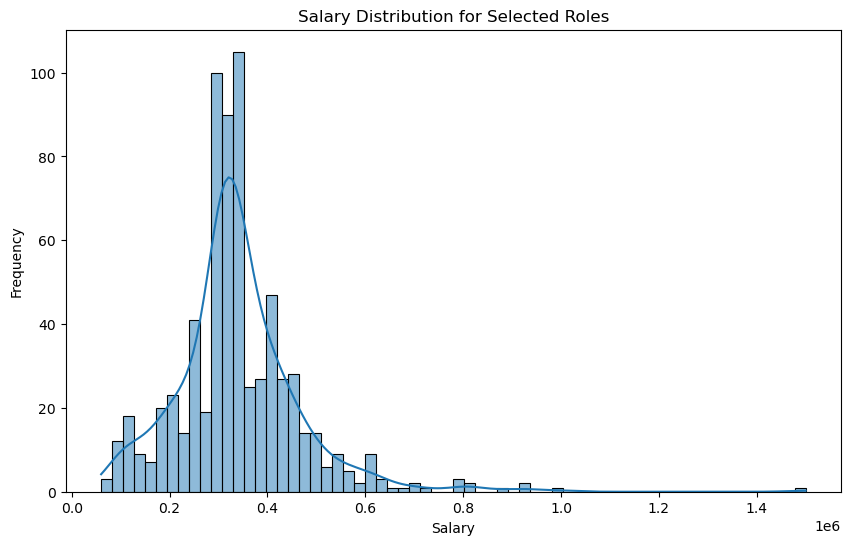

In [372]:
plt.figure(figsize=(10,6))
sns.histplot(data=filtered_df, x="Salary", kde=True)
plt.title('Salary Distribution for Selected Roles')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [373]:
max_salary = filtered_df['Salary'].max()

In [374]:
if max_salary >= 250000 and max_salary <= 300000:
    print("Fail to Reject Null Hypothesis (H1): The claim that Recent graduates can earn between 2.5 - 3 lakhs is supported by the data.")
else:
    print("Reject Null Hypothesis (H0): The claim that Recent graduates can earn between 2.5 - 3 lakhs is not supported by the data.")

Reject Null Hypothesis (H0): The claim that Recent graduates can earn between 2.5 - 3 lakhs is not supported by the data.


* **Observation:**
    * `Reject Null Hypothesis (H0)` - `Reject Null Hypothesis (H0): The claim that Recent graduates can earn between 2.5 - 3 lakhs is not supported by the data.`

## Conclusions

- The data reveals a gender imbalance, indicating a need for diversity efforts in the workforce.
- Technical skills, particularly in Computer Science and Engineering, are in high demand based on the prevalence of related degrees.
- Job roles vary widely, with Software Engineer being the most common, followed by Developer.
- Educational board preferences influence policies, with a preference for State Boards, CBSE, and ICSE.
- Technical expertise is crucial, as evidenced by the prevalence of Bachelor of Technology/Engineering graduates.
- Managerial and technical positions are the highest-earning roles.
- College tier impacts earnings, with Tier-1 graduates earning more.
- Gender-based salary differences exist, though further analysis is needed for clarity.
- The claim about recent graduates' earnings in Computer Science Engineering was not supported by the data.
- There's no significant link between gender and specialization preference, challenging assumptions about their correlation.
